this notebook created histogram for all ages I have and also create png files for all the movies in XY plane, RZ plane, and fe-$\alpha$ plane. 

This also creates chemical cell plots colored by age and actions.

We found some very old stars at the outer galaxy that has very small Jr.

In [1]:
from HeaderP import *

In [2]:
ages=importage("ALL",dist=True)

In [3]:
print(np.shape(ages))

(321779, 17)


(0.0, 20.0)

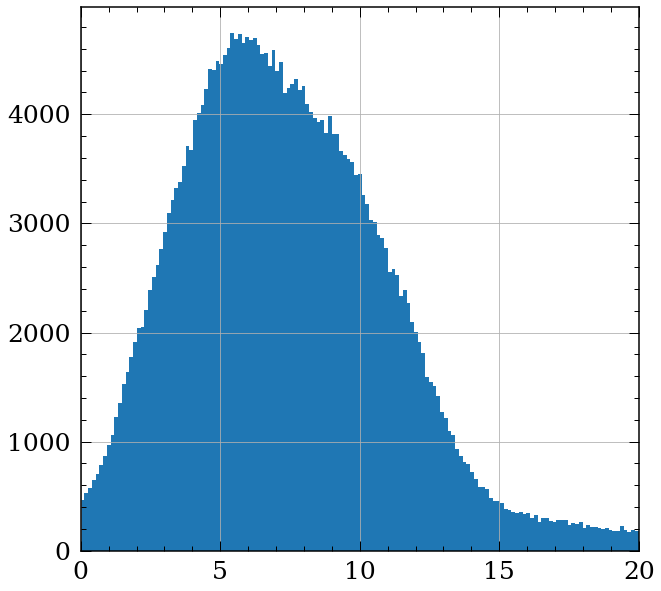

In [4]:
ages['age'].hist(bins=np.linspace(0,20,150))
plt.xlim([0,20])
#plt.yscale('log')

Text(0, 0.5, 'z')

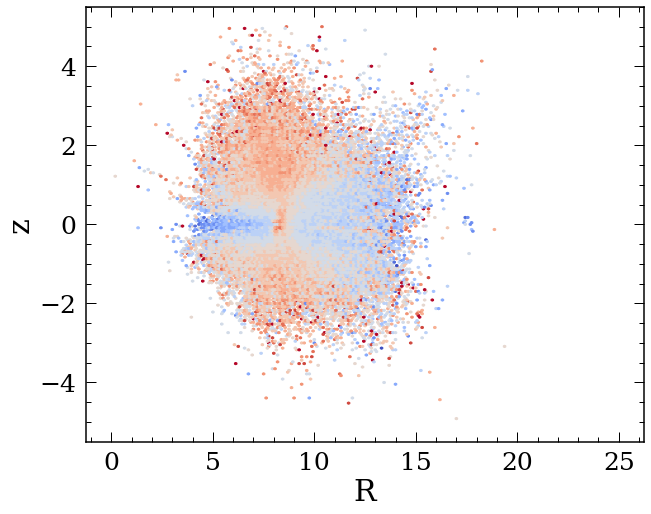

In [5]:
#print(np.shape(ages))
#ages=ages.loc[ages['feh']<-1].reset_index(drop=True)
#print(np.shape(ages))

plt.figure(figsize=(10,8))
cm = plt.get_cmap('coolwarm',14)
#plt.scatter(ages['R'],ages['z'],c=ages['age'],s=1,vmin=0,vmax=15)
plt.hexbin(ages['R'],ages['z'],C=ages['age'],vmin=0,vmax=14,cmap=cm, gridsize=200,
           extent=(0,25,-5,5),mincnt=1)
plt.xlabel('R')
plt.ylabel('z')

## X vs Y

KeyboardInterrupt: 

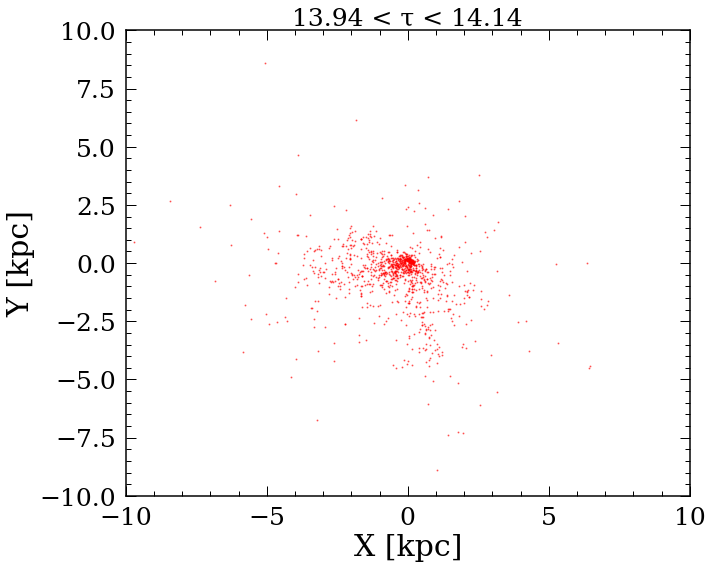

In [6]:
# plot only age intervals
ageinv=np.linspace(20,0,100)
for i in range(len(ageinv)-1):
    age_sing=ages.loc[(ages['age']>ageinv[i+1])&(ages['age']<ageinv[i])]
    plt.figure(figsize=(10,8))
    #plt.scatter(ages['X'],ages['Y'],s=1,c='k',alpha=0.2)
    plt.scatter(age_sing['X'],age_sing['Y'],s=1,c='r',alpha=0.5)
    plt.xlabel('X [kpc]')
    plt.ylabel('Y [kpc]')
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.title('%.2f < τ < %.2f'%(ageinv[i+1],ageinv[i]),fontsize=25)
    plt.tight_layout()
    plt.savefig('XYmovie/'+str(i)+'.png')
    plt.close()

In [ ]:
# plot all stars older than some age
ageinv=np.linspace(20,0,100)
for i in range(len(ageinv)-1):
    age_sing=ages.loc[(ages['age']>ageinv[i+1])]
    plt.figure(figsize=(10,8))
    #plt.scatter(ages['X'],ages['Y'],s=1,c='k',alpha=0.2)
    plt.scatter(age_sing['X'],age_sing['Y'],s=1,c='r',alpha=0.5)
    plt.xlabel('X [kpc]')
    plt.ylabel('Y [kpc]')
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.title('τ = %.2f'%(ageinv[i+1]),fontsize=25)
    plt.tight_layout()
    plt.savefig('XYmovie/allstar_'+str(i)+'.png')
    plt.close()

## R vs z

In [8]:
# plot only age intervals
ageinv=np.linspace(20,0,100)
for i in range(len(ageinv)-1):
    age_sing=ages.loc[(ages['age']>ageinv[i+1])&(ages['age']<ageinv[i])]
    plt.figure(figsize=(10,8))
    plt.scatter(age_sing['R'],age_sing['z'],s=1,c='r',alpha=0.5)
    plt.xlabel('R [kpc]')
    plt.ylabel('z [kpc]')
    plt.xlim([0,10])
    plt.ylim([-5,5])
    plt.title('%.2f < τ < %.2f'%(ageinv[i+1],ageinv[i]),fontsize=25)
    plt.tight_layout()
    plt.savefig('RZmovie/'+str(i)+'.png')
    plt.close()

In [9]:
# plot only age intervals
ageinv=np.linspace(20,0,100)
for i in range(len(ageinv)-1):
    age_sing=ages.loc[(ages['age']>ageinv[i+1])]
    plt.figure(figsize=(10,8))
    plt.scatter(age_sing['R'],age_sing['z'],s=1,c='r',alpha=0.5)
    plt.xlabel('R [kpc]')
    plt.ylabel('z [kpc]')
    plt.xlim([0,10])
    plt.ylim([-5,5])
    plt.title('τ = %.2f'%(ageinv[i+1]),fontsize=25)
    plt.tight_layout()
    plt.savefig('RZmovie/allstar_'+str(i)+'.png')
    plt.close()

## in fe-alpha plane

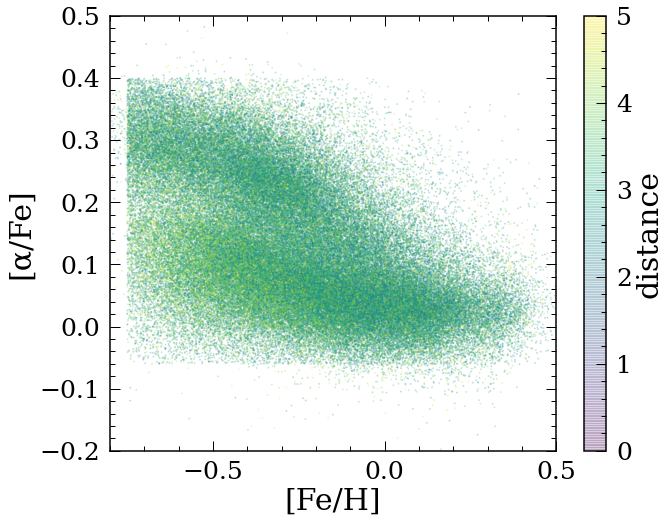

In [7]:
plt.figure(figsize=(10,8))
ages_plot=ages.loc[((ages['dist']/1000)>2)&((ages['dist']/1000)<5)]
plt.scatter(ages_plot['feh'],ages_plot['mg_fe'],s=1,c=abs(ages_plot['dist']/1000),vmin=0,vmax=5,alpha=0.2)
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
plt.xlim([-0.8,0.5])
plt.ylim([-0.2,0.5])
cbar = plt.colorbar()
cbar.set_label('distance')

In [8]:
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)

ageinv=np.linspace(20,0,100)
for i in range(len(ageinv)-1):
    plt.figure(figsize=(10,8))
    age_sing=ages.loc[(ages['age']>ageinv[i+1])&(ages['age']<ageinv[i])]
    #plt.scatter(age_sing['feh'],age_sing['mg_fe'],s=1,c=age_sing['age'],vmin=0,vmax=5,alpha=0.2)
    plt.hexbin(age_sing['feh'],age_sing['mg_fe'],cmap=cmap1,
               gridsize=50,vmin=0,vmax=10, extent=(-0.8,0.5,-0.2,0.5),mincnt=1)
    plt.xlabel('[Fe/H]')
    plt.ylabel('[α/Fe]')
    plt.xlim([-0.8,0.5])
    plt.ylim([-0.2,0.5])
    cbar = plt.colorbar()
    cbar.set_label('density')
    plt.title('%.2f < τ < %.2f; %d stars'%(ageinv[i+1],ageinv[i],len(age_sing)),fontsize=25)
    plt.tight_layout()
    plt.savefig('fe_mg/'+str(i)+'.png')
    plt.close()

In [9]:
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)

ageinv=np.linspace(20,0,100)
for i in range(len(ageinv)-1):
    plt.figure(figsize=(10,8))
    age_sing=ages.loc[(ages['age']>ageinv[i+1])]
    #plt.scatter(age_sing['feh'],age_sing['mg_fe'],s=1,c=age_sing['age'],vmin=0,vmax=5,alpha=0.2)
    plt.hexbin(age_sing['feh'],age_sing['mg_fe'],cmap=cmap1,
               gridsize=50,vmin=0,vmax=1000, extent=(-0.8,0.5,-0.2,0.5),mincnt=1)
    plt.xlabel('[Fe/H]')
    plt.ylabel('[α/Fe]')
    plt.xlim([-0.8,0.5])
    plt.ylim([-0.2,0.5])
    cbar = plt.colorbar()
    cbar.set_label('density')
    plt.title('τ = %.2f'%(ageinv[i+1]),fontsize=25)
    plt.tight_layout()
    plt.savefig('fe_mg/allstar_'+str(i)+'.png')
    plt.close()

### orbital plane

In [35]:
lamost_dist=importage("LAMOST")
lamost_all=importage("LAMOST",dist=True)
allages=importage("ALL",dist=True)
orbit=loaddata('LAMOSTkin')

In [36]:
lamost_all=pd.merge(lamost_all,allages[['age','l','b']],left_on='age',right_on='age',how='inner')
lamost_dist=pd.merge(lamost_dist,allages[['age','l','b','X','Y','z','R']],left_on='age',right_on='age',how='inner')
lamost_orbit=pd.merge(orbit,lamost_dist[['chisq','source_id_1','age','l','b','r_med_geo','feh','mg_fe','X','Y']],
                      left_on='source_id_1',right_on='source_id_1',how='inner')

In [37]:
print('w/ distances:',np.size(lamost_dist))
print('w/ orbital info:',np.size(lamost_orbit))

w/ distances: 20016864
w/ orbital info: 19400544


Text(0, 0.5, 'Cannon [Fe/h]')

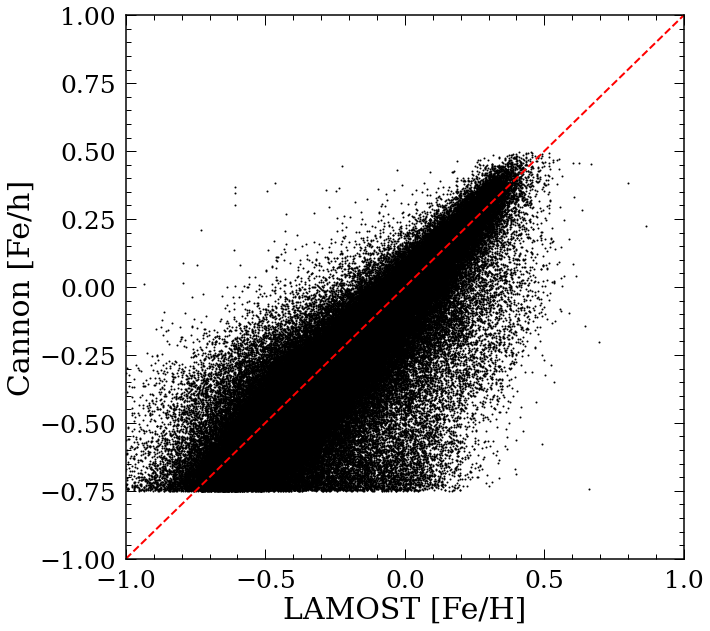

In [38]:
plt.scatter(lamost_orbit['feh_x'],lamost_orbit['feh_y'],s=1,c='k')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.plot([-1,1],[-1,1],'r--')
plt.xlabel('LAMOST [Fe/H]')
plt.ylabel('Cannon [Fe/h]')

  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

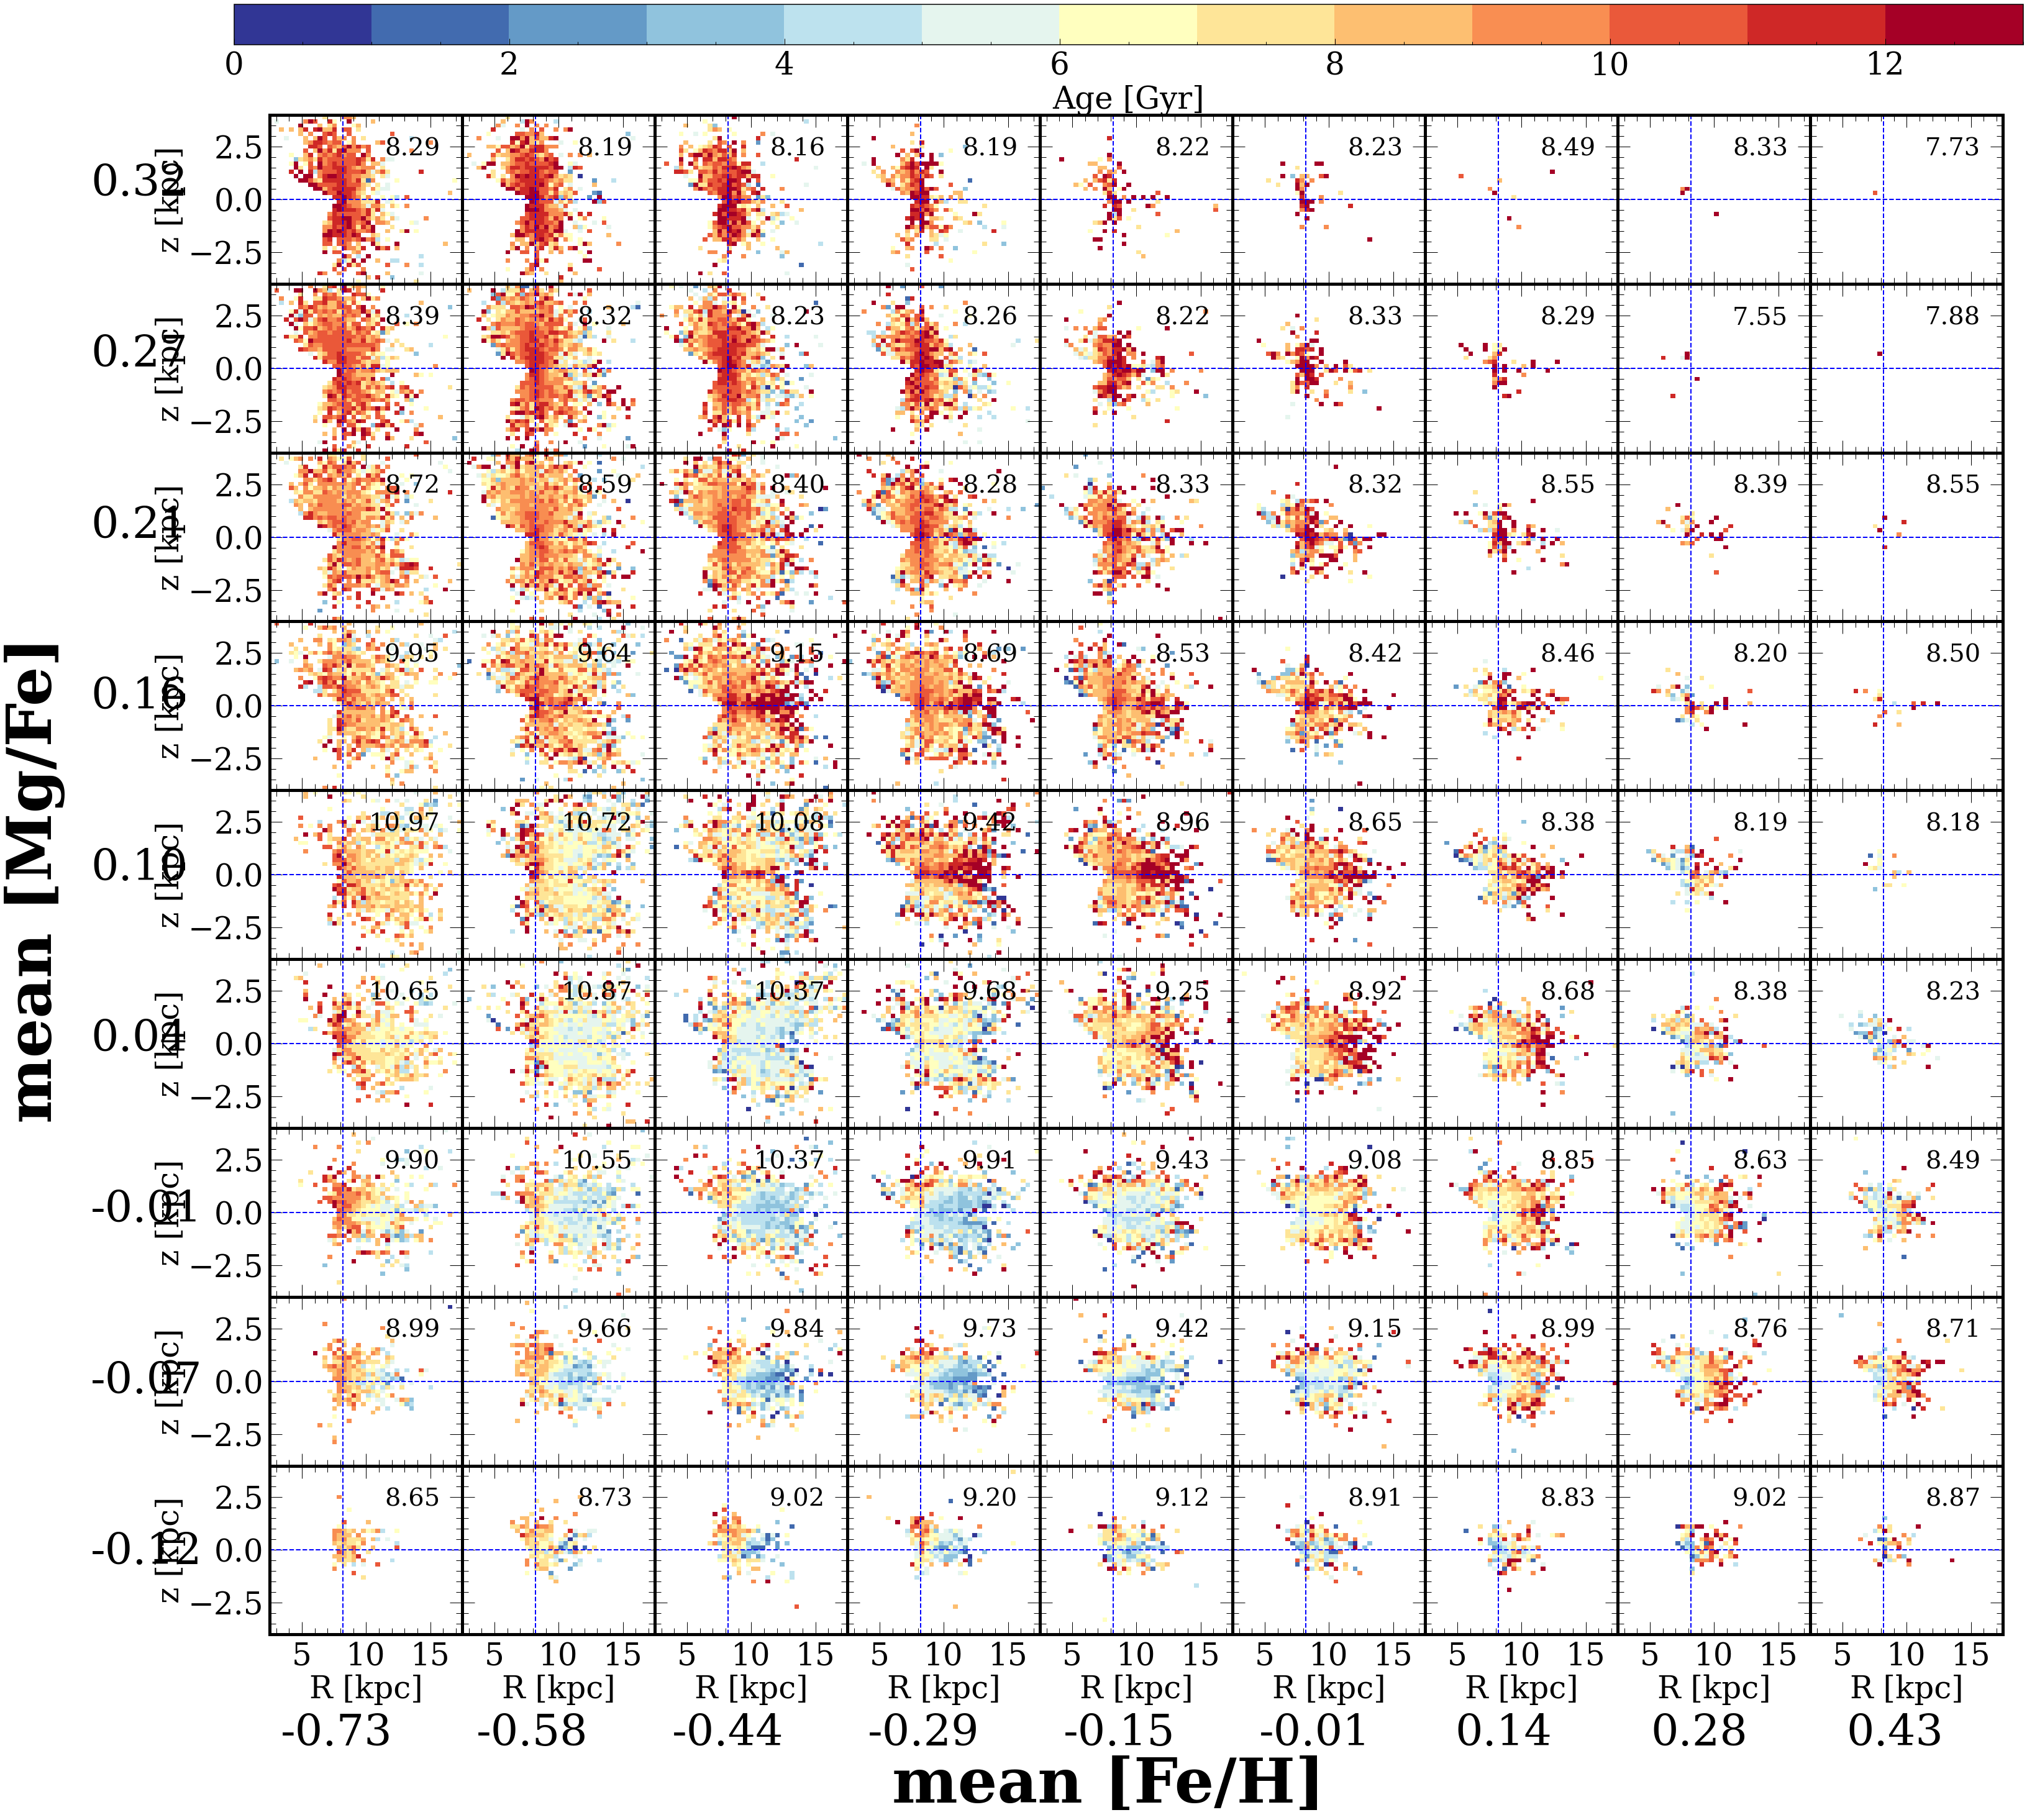

In [39]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(lamost_orbit))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=lamost_orbit.loc[lamost_orbit['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


plt.savefig('monofealpha.png')





<AxesSubplot:>

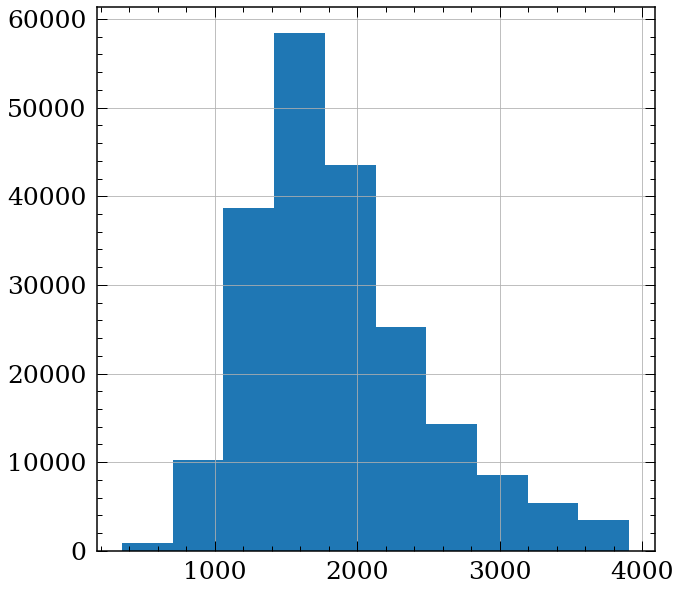

In [40]:
lamost_orbit['chisq'].hist()

  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

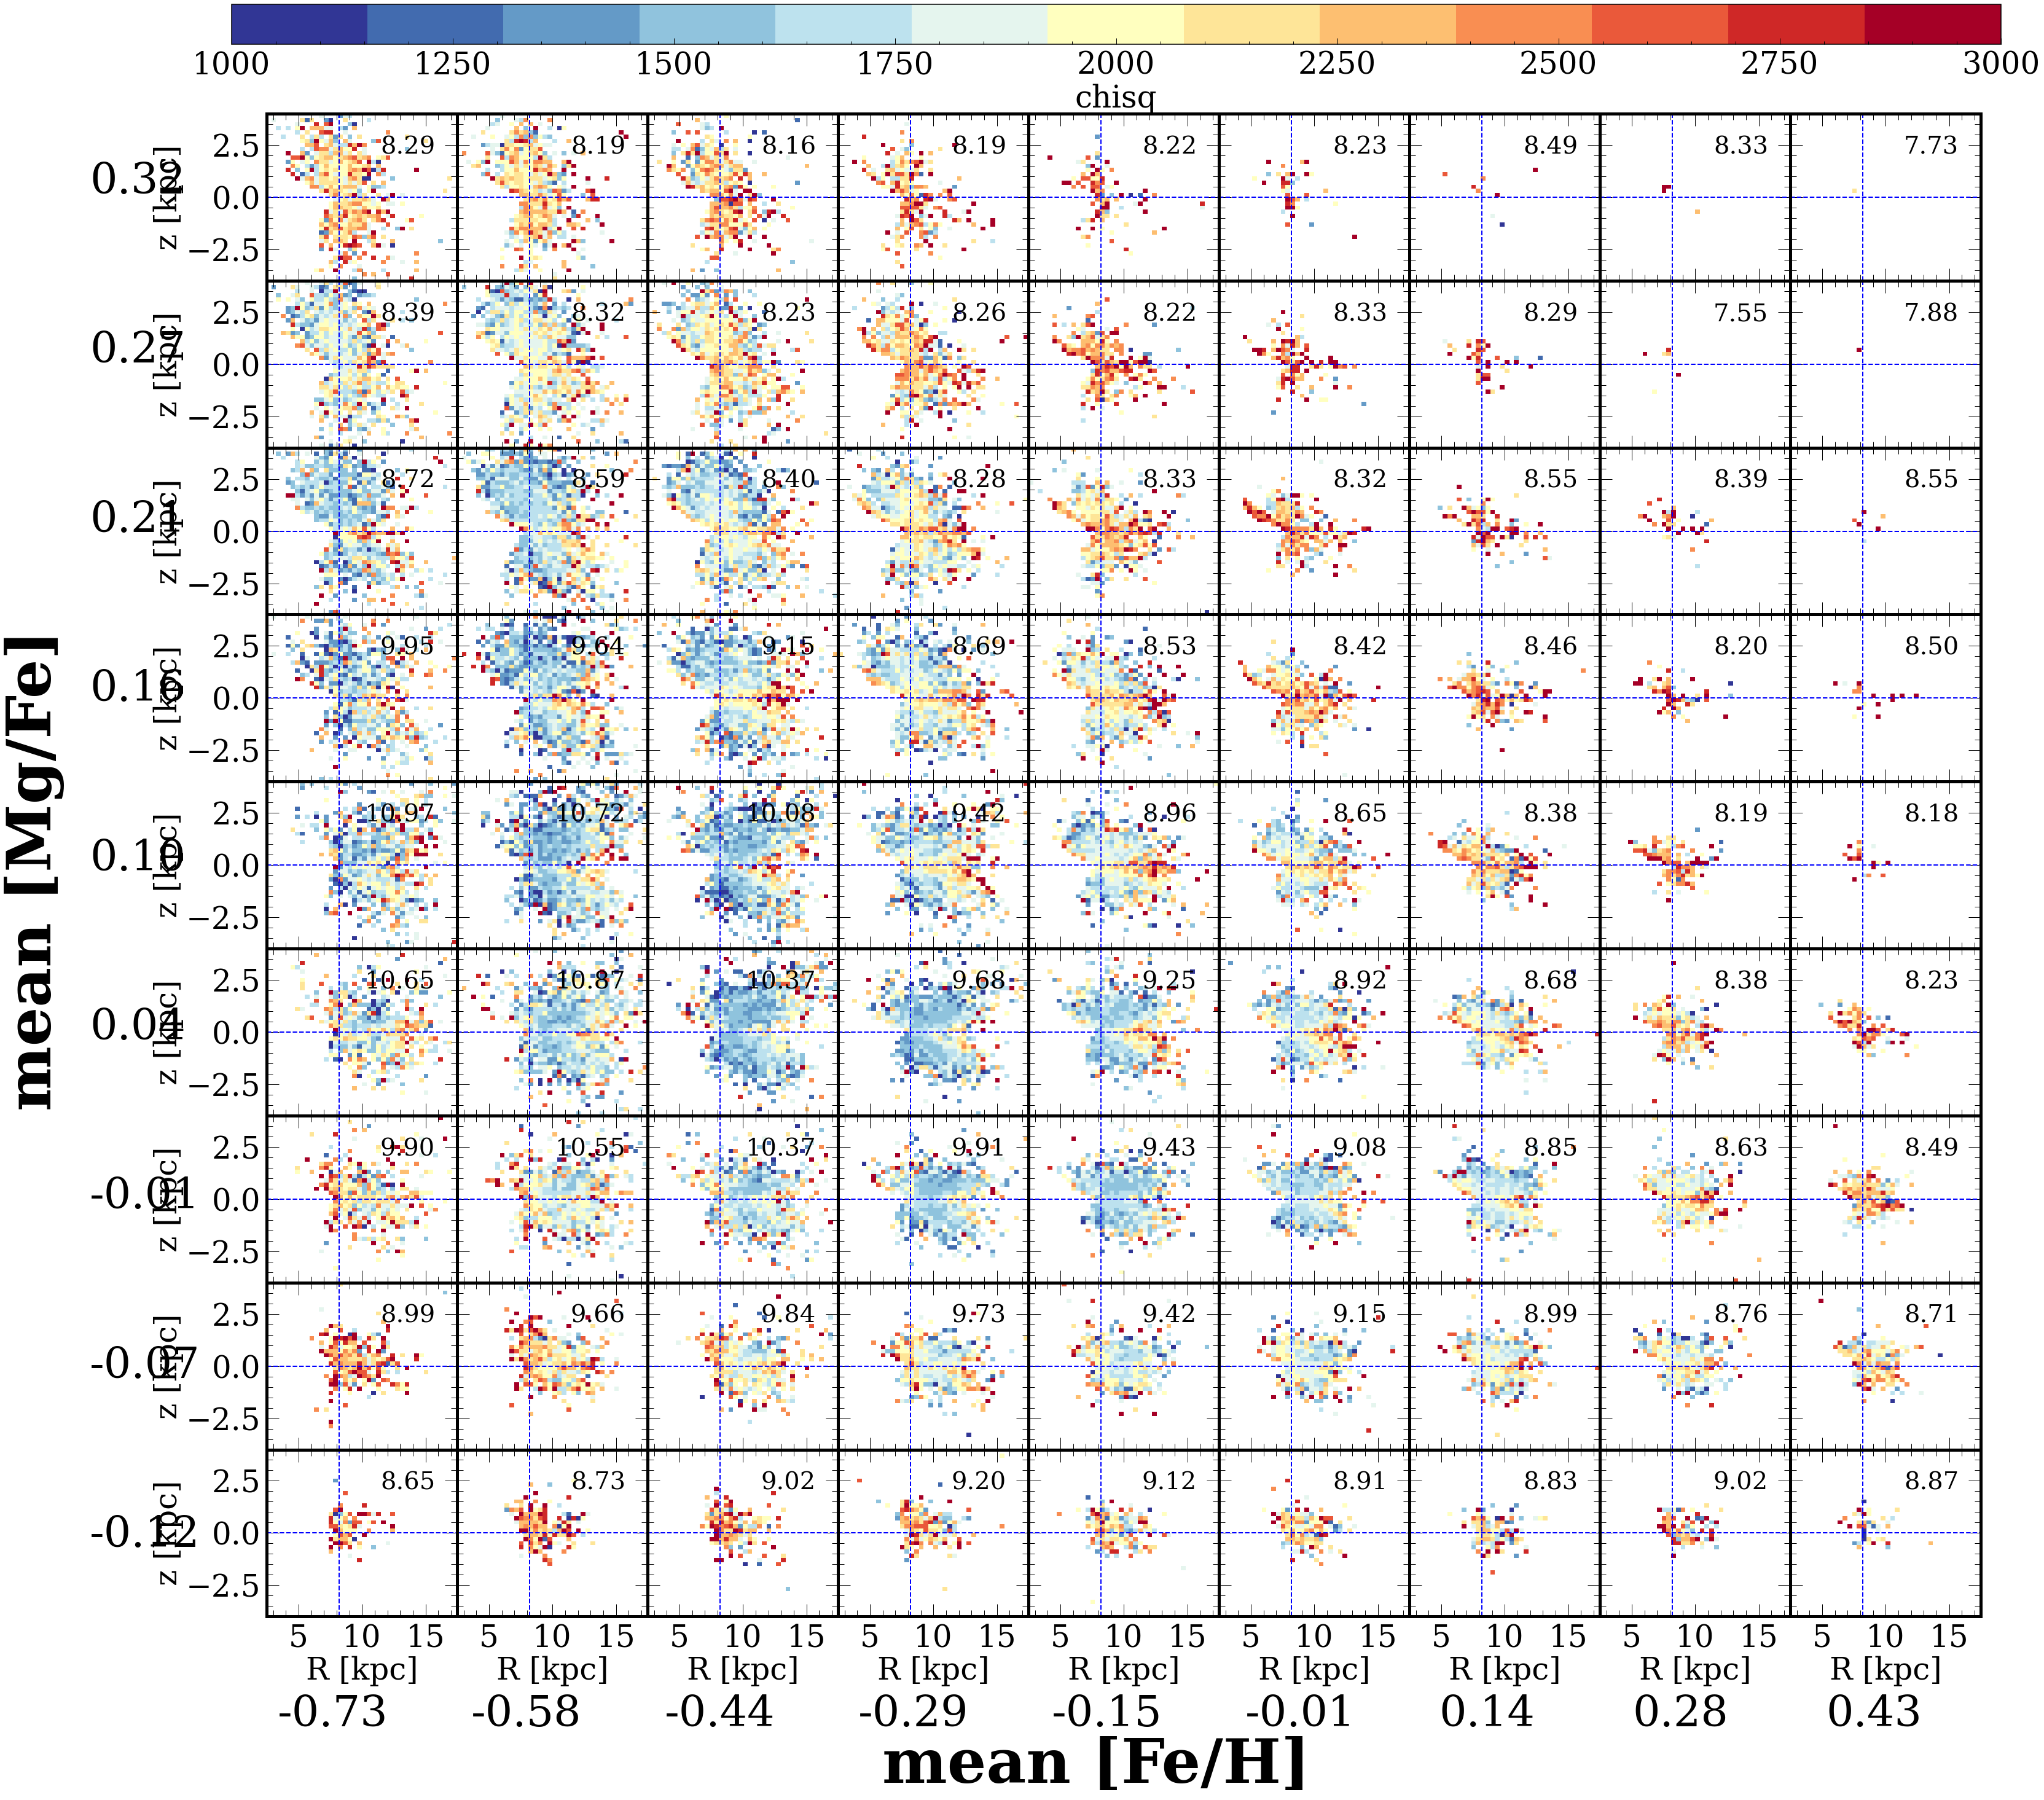

In [28]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(lamost_orbit))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=lamost_orbit.loc[lamost_orbit['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['chisq'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=1000,vmax=3000)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('chisq',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        







Text(0, 0.5, '$Χ^2$')

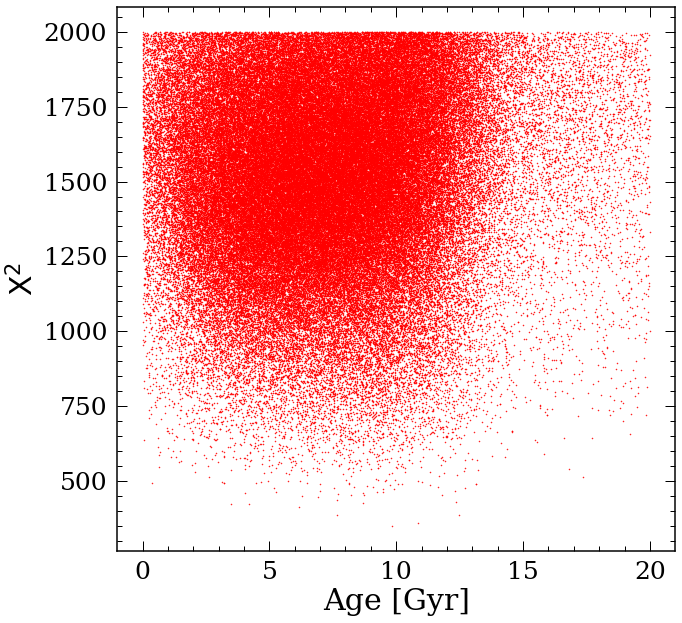

In [45]:
plt.plot(lamost_orbit['age'],lamost_orbit['chisq'],'r.',markersize=1)
plt.xlabel('Age [Gyr]')
plt.ylabel('$Χ^2$')

In [41]:
# cut chisq>2000
lamost_orbit=lamost_orbit.loc[lamost_orbit['chisq']<2000].reset_index()



  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

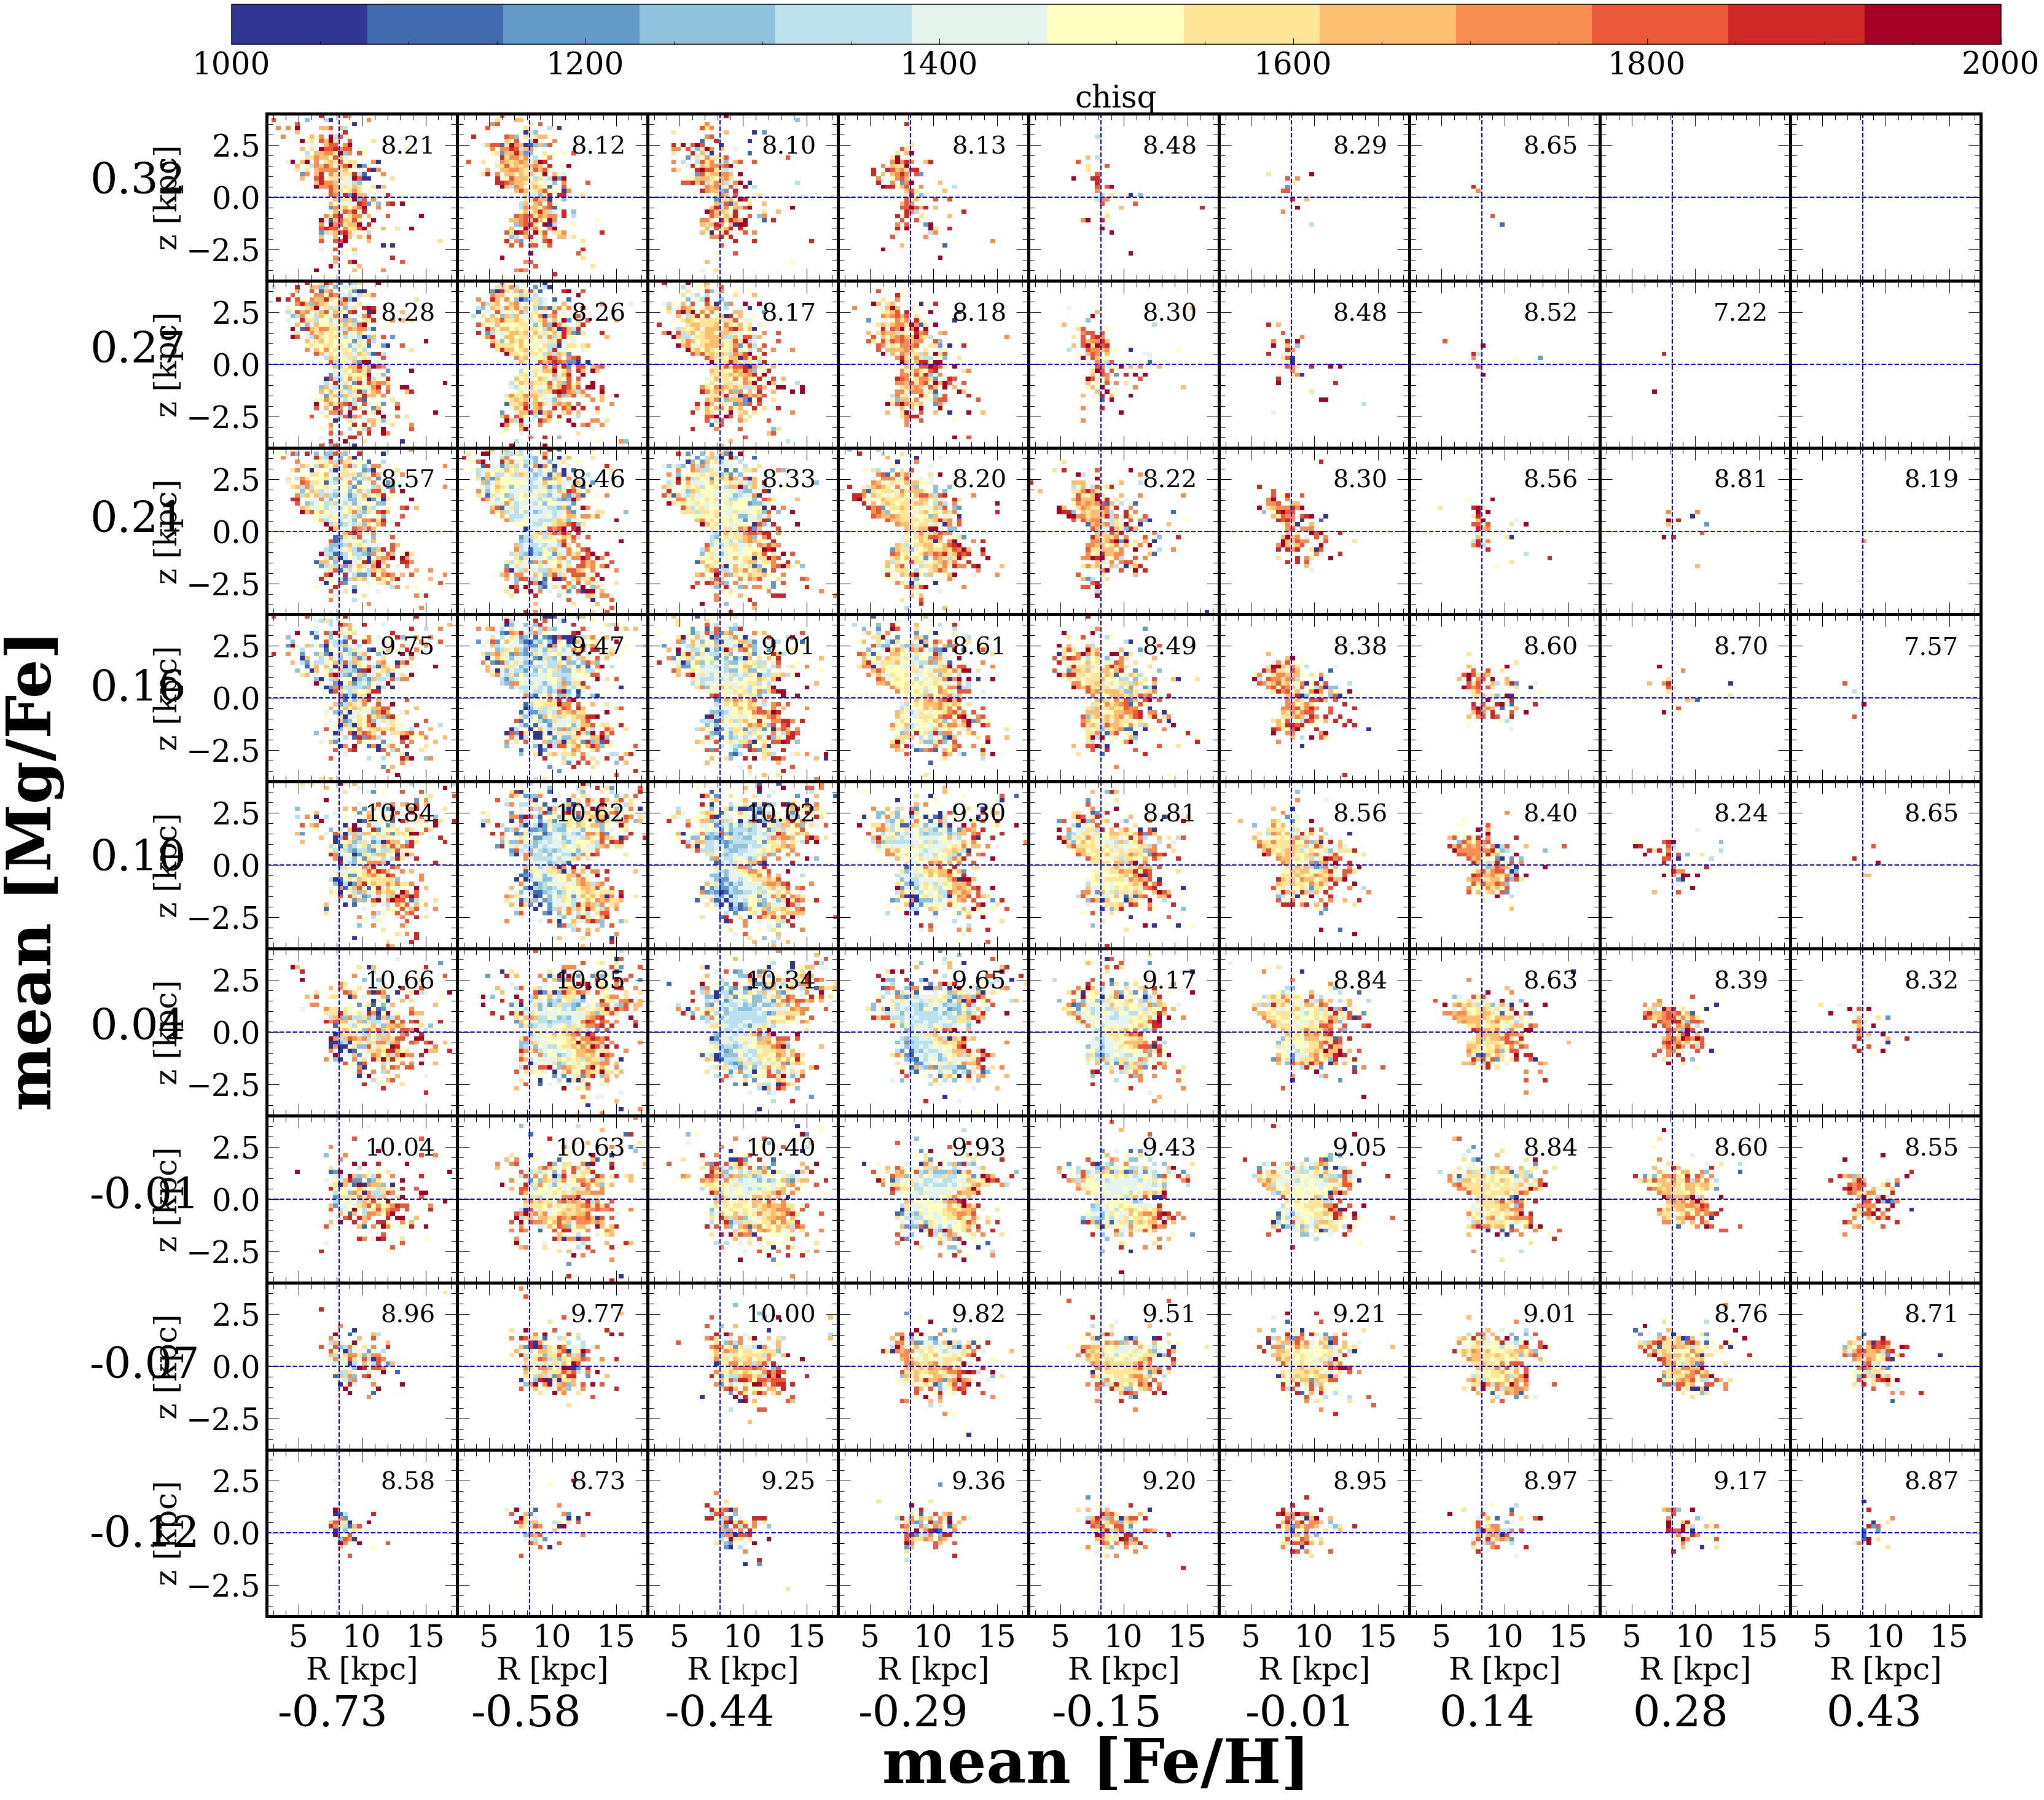

In [43]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(lamost_orbit))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=lamost_orbit.loc[lamost_orbit['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['chisq'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=1000,vmax=2000)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('chisq',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        








  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

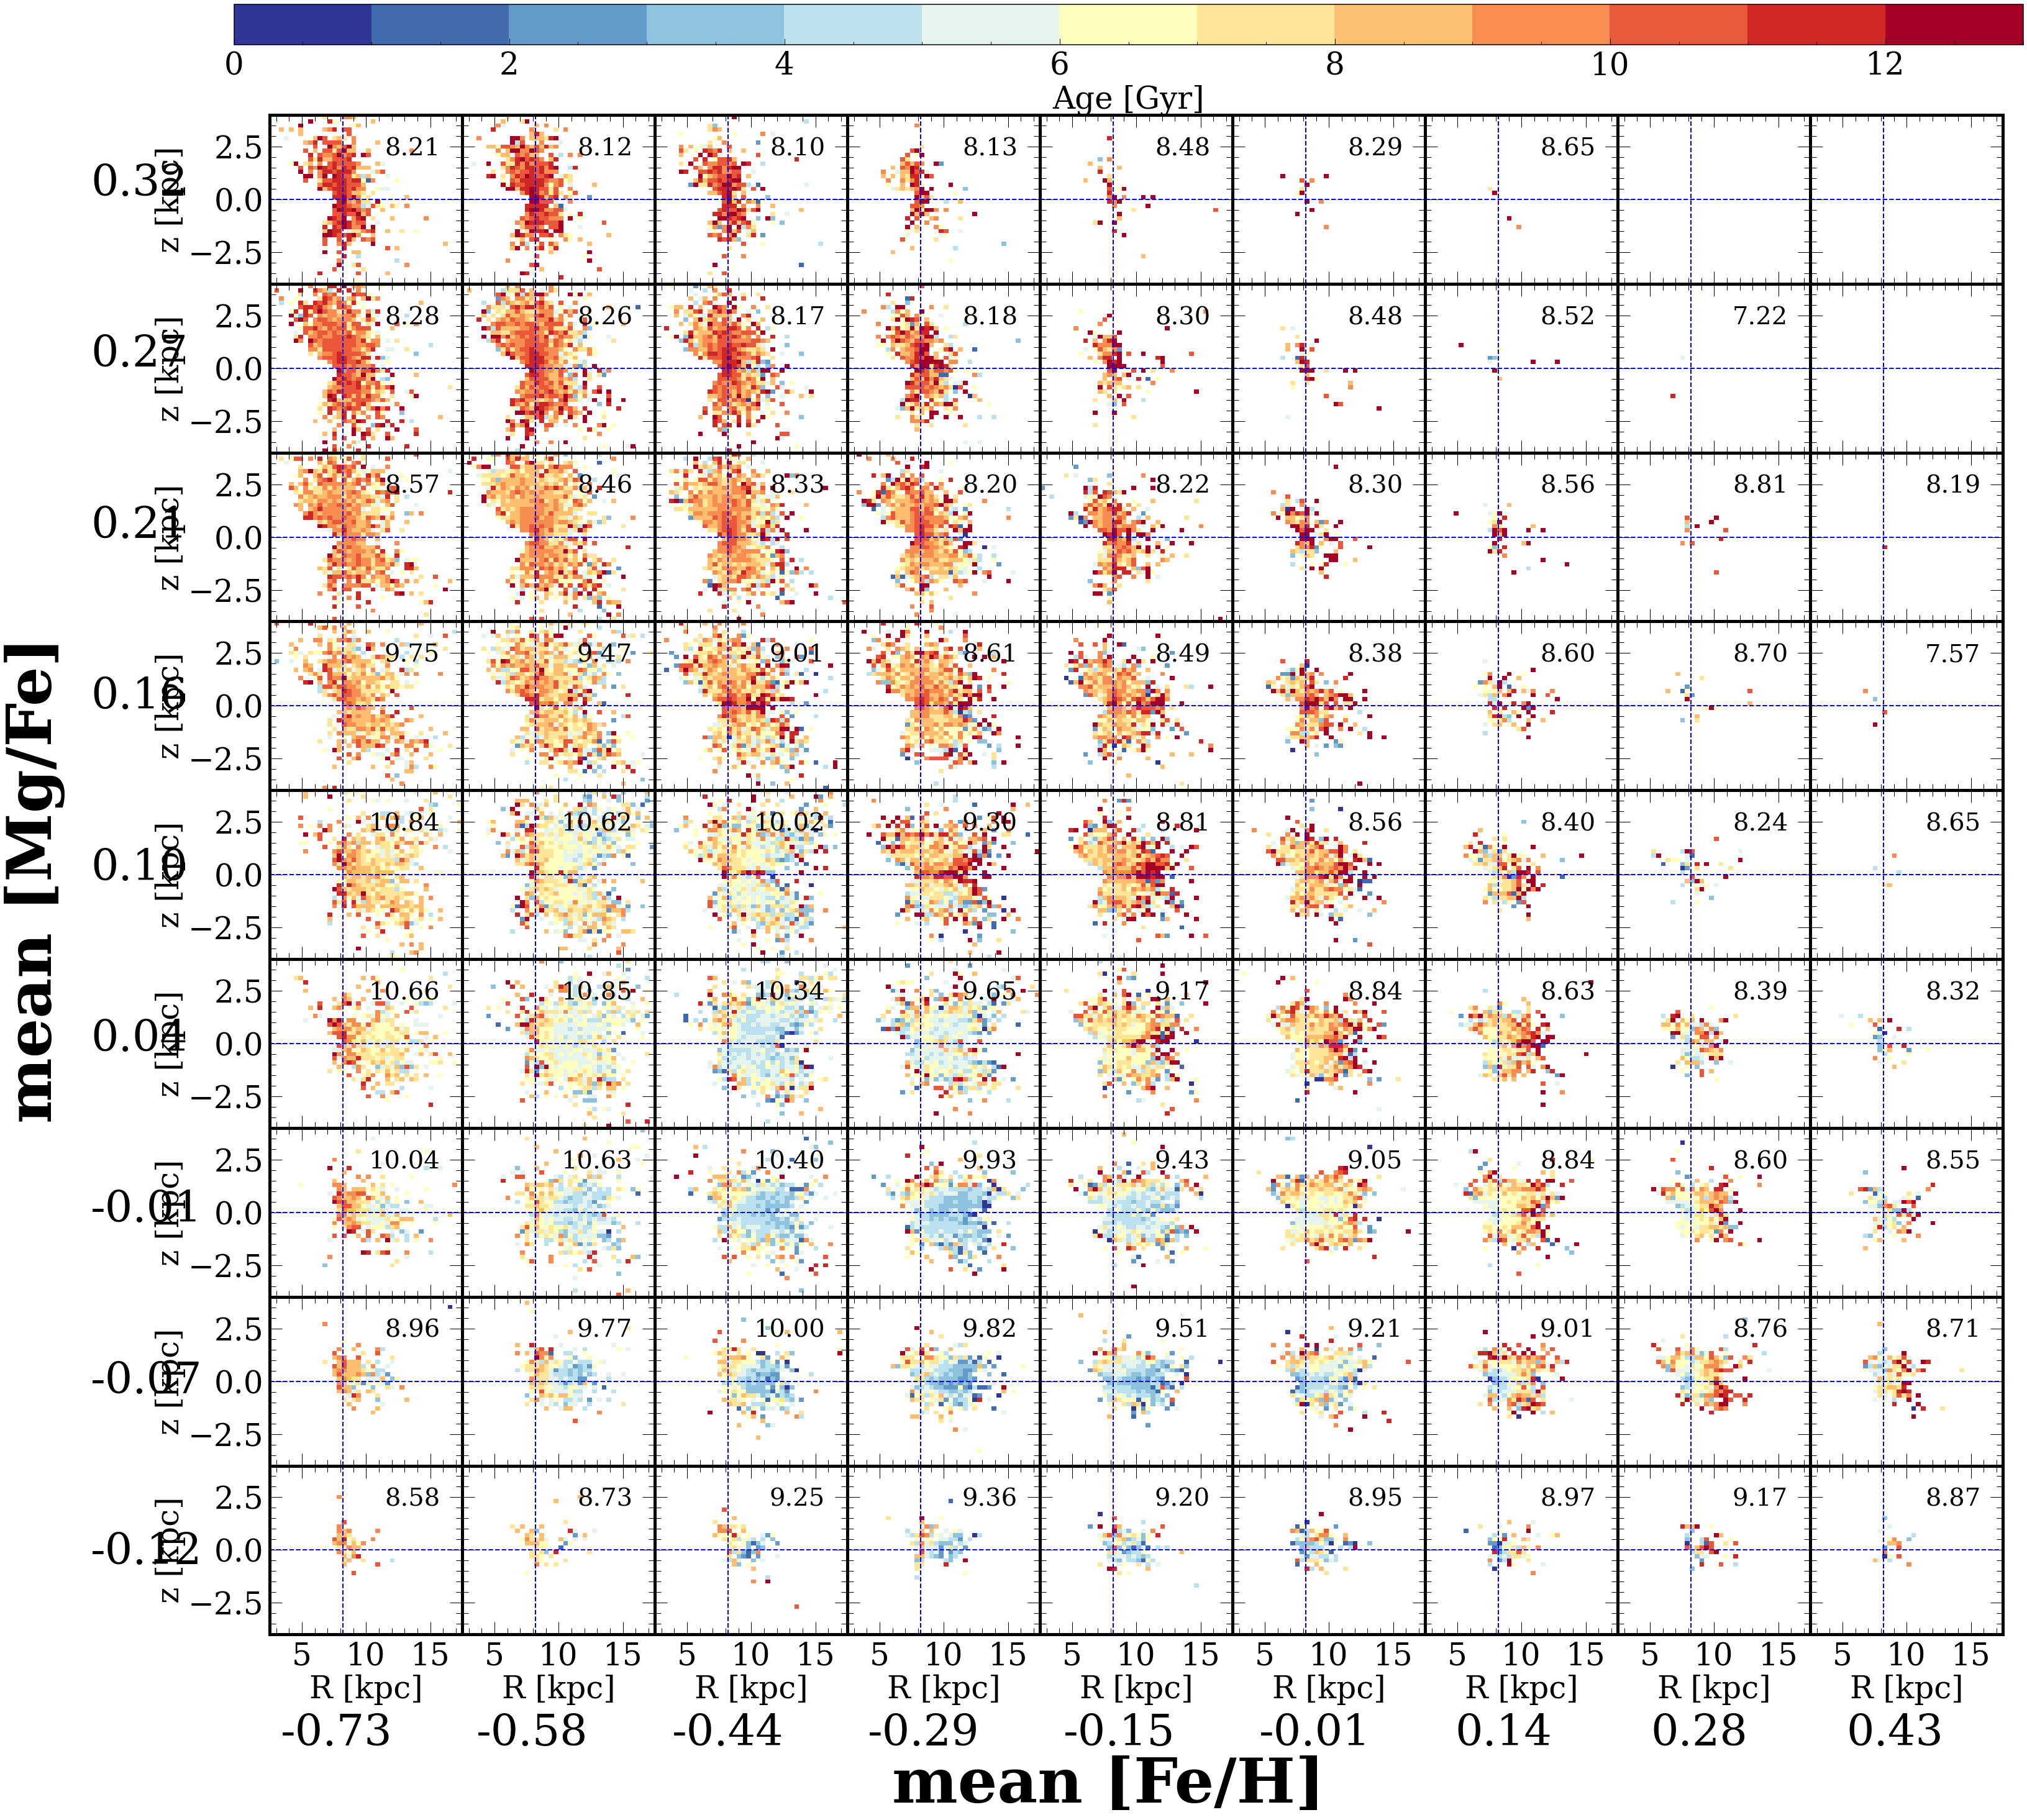

In [44]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(lamost_orbit))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=lamost_orbit.loc[lamost_orbit['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


#plt.savefig('monofealpha.png')






### look at action

In [18]:
lamost_orbit.columns

Index(['designation', 'ra_lamost', 'dec_lamost', 'rv', 'rv_err', 'feh_x',
       'teff', 'logg', 'snrr', 'ra_epoch2000', 'dec_epoch2000', 'errHalfMaj',
       'errHalfMin', 'errPosAng', 'source_id_1', 'ra', 'ra_error', 'dec',
       'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pm',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'astrometric_n_good_obs_al', 'astrometric_gof_al',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'pseudocolour', 'pseudocolour_error', 'visibility_periods_used', 'ruwe',
       'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_mag', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_mag', 'bp_rp',
       'dr2_radial_velocity', 'dr2_radial_velocity_error',
       'dr2_rv_nb_transits', 'dr2_rv_template_teff', 'dr2_rv_template_logg',
       'panstarrs

array([[<AxesSubplot:title={'center':'Jphi'}>,
        <AxesSubplot:title={'center':'Jz'}>],
       [<AxesSubplot:title={'center':'JR'}>, <AxesSubplot:>]],
      dtype=object)

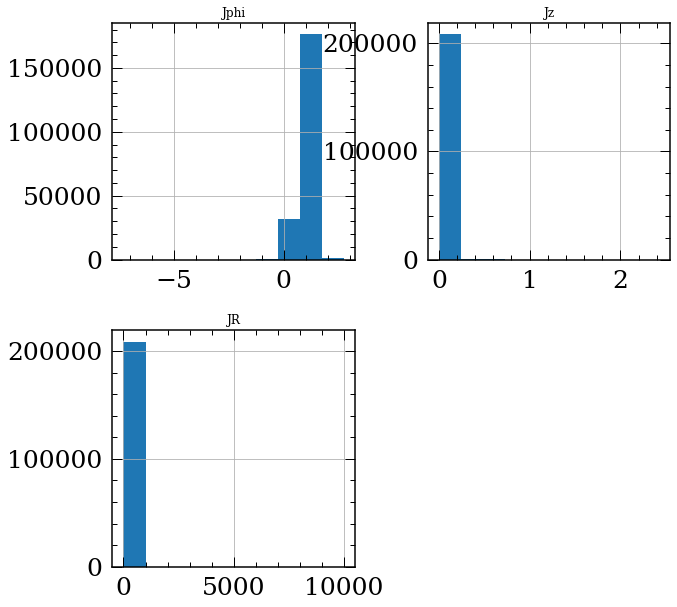

In [19]:
lamost_orbit[['Jphi','Jz','JR']].hist()

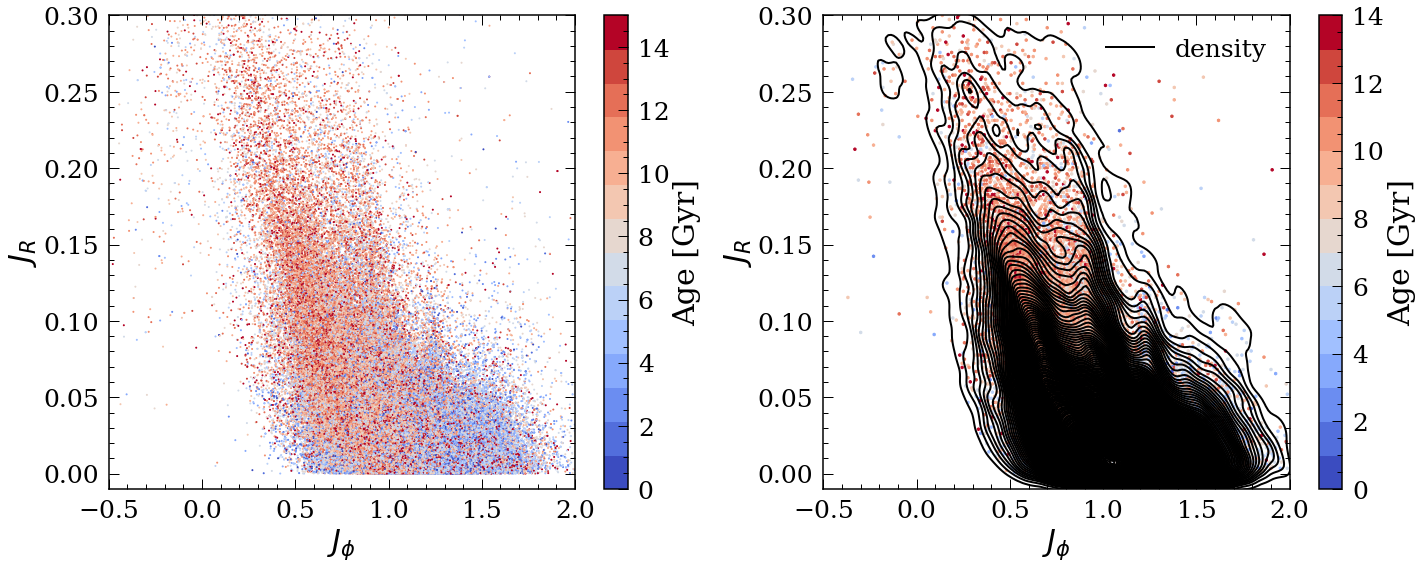

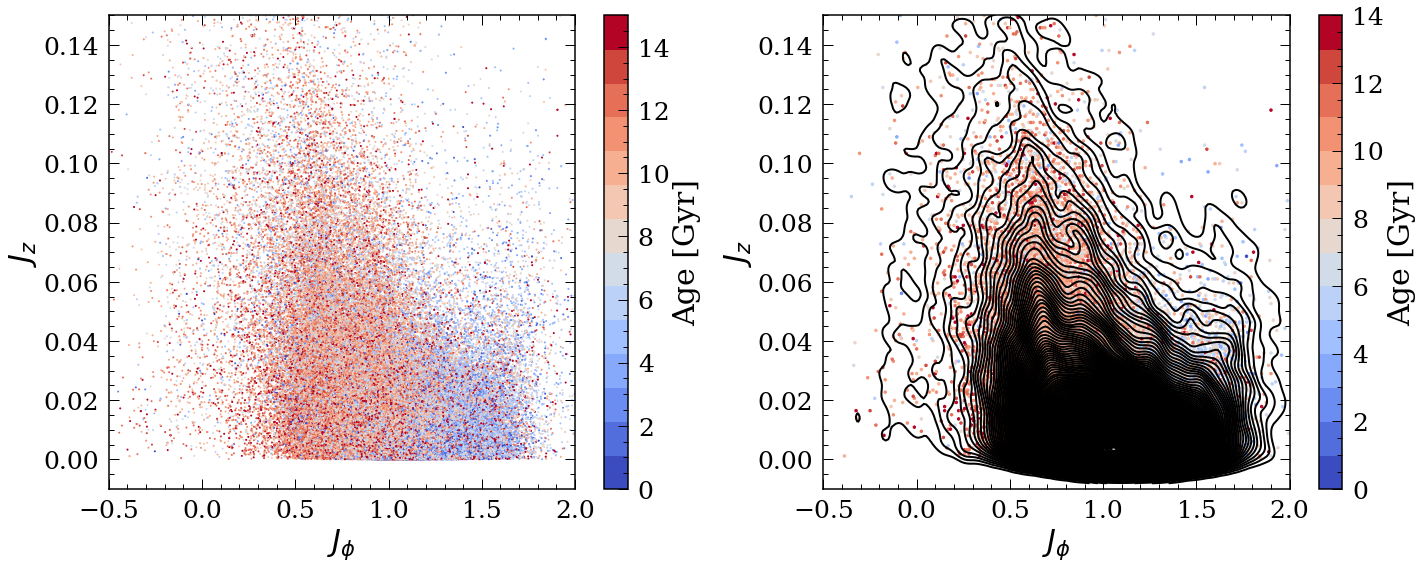

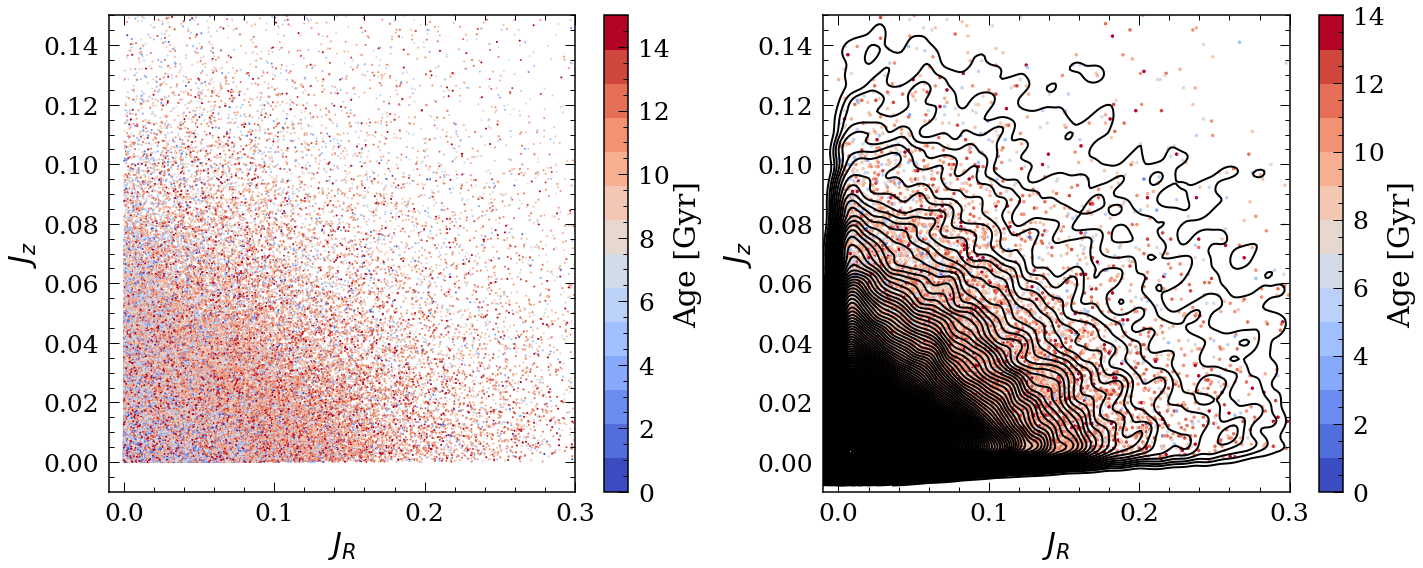

In [20]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cm = plt.get_cmap('coolwarm',14)
plt.scatter(lamost_orbit['Jphi'],lamost_orbit['JR'],c=lamost_orbit['age'],s=1,cmap=cm,vmin=0,vmax=15)
plt.xlim([-0.5,2])
plt.ylim([-0.01,0.3])
plt.xlabel('$J_ϕ$')
plt.ylabel('$J_R$')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]')

x1,x2,y1,y2=-0.5,2,-0.01,0.3
plt.subplot(1,2,2)
cm = plt.get_cmap('coolwarm',14)
plt.hexbin(lamost_orbit['Jphi'],lamost_orbit['JR'],C=lamost_orbit['age'],vmin=0,vmax=14,cmap=cm, gridsize=200,
           extent=(x1,x2,y1,y2),mincnt=1)
m=(lamost_orbit['Jphi']>-0.5)&(lamost_orbit['Jphi']<2)
m=m&((lamost_orbit['JR']>-0.01)&(lamost_orbit['JR']<0.3))
sns.kdeplot(x=lamost_orbit['Jphi'].values[m], y=lamost_orbit['JR'].values[m],levels=200, color='k',
            thresh=0,label='density')
plt.xlim([-0.5,2])
plt.ylim([-0.01,0.3])
plt.xlabel('$J_ϕ$')
plt.ylabel('$J_R$')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]')
plt.legend()
plt.tight_layout()







plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cm = plt.get_cmap('coolwarm',14)
plt.scatter(lamost_orbit['Jphi'],lamost_orbit['Jz'],c=lamost_orbit['age'],s=1,cmap=cm,vmin=0,vmax=15)
plt.xlim([-0.5,2])
plt.ylim([-0.01,0.15])
plt.xlabel('$J_ϕ$')
plt.ylabel('$J_z$')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]')

x1,x2,y1,y2=-0.5,2,-0.01,0.15
plt.subplot(1,2,2)
cm = plt.get_cmap('coolwarm',14)
plt.hexbin(lamost_orbit['Jphi'],lamost_orbit['Jz'],C=lamost_orbit['age'],vmin=0,vmax=14,cmap=cm, gridsize=200,
           extent=(x1,x2,y1,y2),mincnt=1)
m=(lamost_orbit['Jphi']>-0.5)&(lamost_orbit['Jphi']<2)
m=m&((lamost_orbit['Jz']>-0.01)&(lamost_orbit['Jz']<0.15))
sns.kdeplot(x=lamost_orbit['Jphi'].values[m], y=lamost_orbit['Jz'].values[m],levels=200, color='k',
            thresh=0,label='density')
plt.xlim([-0.5,2])
plt.ylim([-0.01,0.15])
plt.xlabel('$J_ϕ$')
plt.ylabel('$J_z$')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]')
plt.tight_layout()








plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cm = plt.get_cmap('coolwarm',14)
plt.scatter(lamost_orbit['JR'],lamost_orbit['Jz'],c=lamost_orbit['age'],s=1,cmap=cm,vmin=0,vmax=15)
plt.xlim([-0.01,0.3])
plt.ylim([-0.01,0.15])
plt.xlabel('$J_R$')
plt.ylabel('$J_z$')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]')

x1,x2,y1,y2=-0.01,0.3,-0.01,0.15
plt.subplot(1,2,2)
cm = plt.get_cmap('coolwarm',14)
plt.hexbin(lamost_orbit['JR'],lamost_orbit['Jz'],C=lamost_orbit['age'],vmin=0,vmax=14,cmap=cm, gridsize=200,
           extent=(x1,x2,y1,y2),mincnt=1)
m=(lamost_orbit['JR']>-0.01)&(lamost_orbit['JR']<0.3)
m=m&((lamost_orbit['Jz']>-0.01)&(lamost_orbit['Jz']<0.15))
sns.kdeplot(x=lamost_orbit['JR'].values[m], y=lamost_orbit['Jz'].values[m],levels=200, color='k',
            thresh=0,label='density')
plt.xlim([-0.01,0.3])
plt.ylim([-0.01,0.15])
plt.xlabel('$J_R$')
plt.ylabel('$J_z$')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]')
plt.tight_layout()

  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

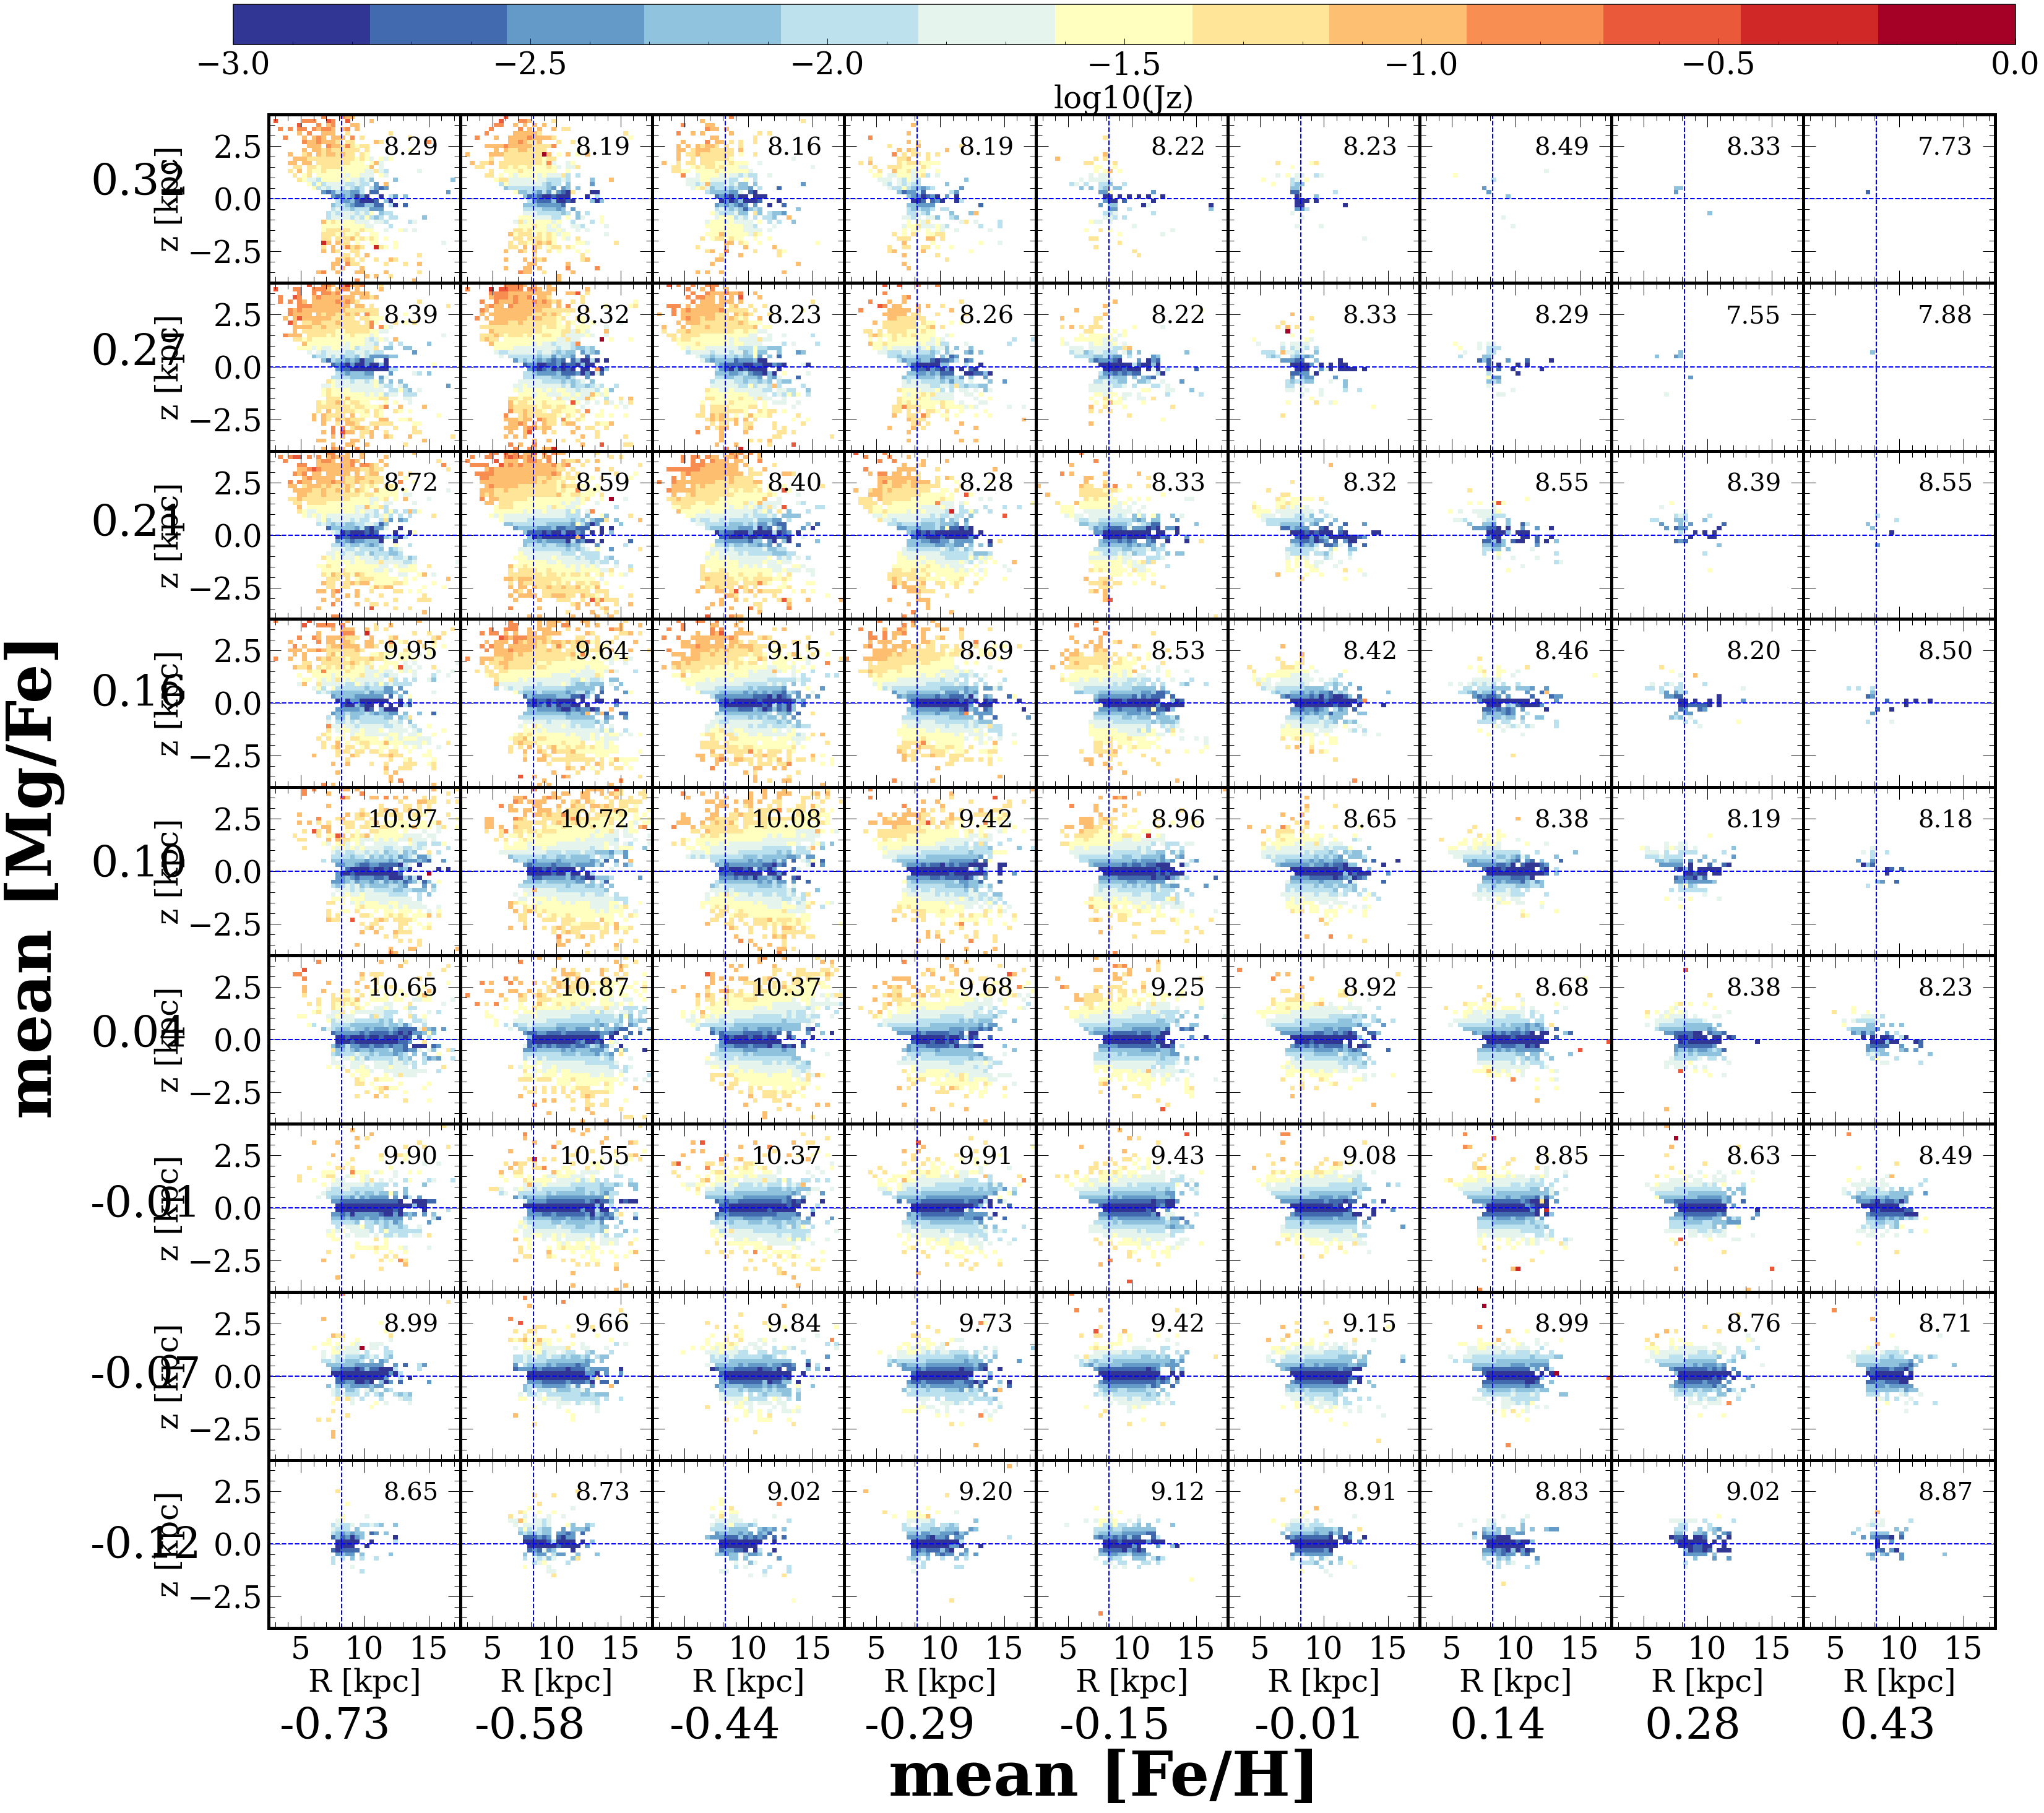

In [21]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(lamost_orbit))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=lamost_orbit.loc[lamost_orbit['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                np.log10(df_all_z['Jz'].values),lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=-3,vmax=0)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('log10(Jz)',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


#plt.savefig('monofealpha.png')






  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

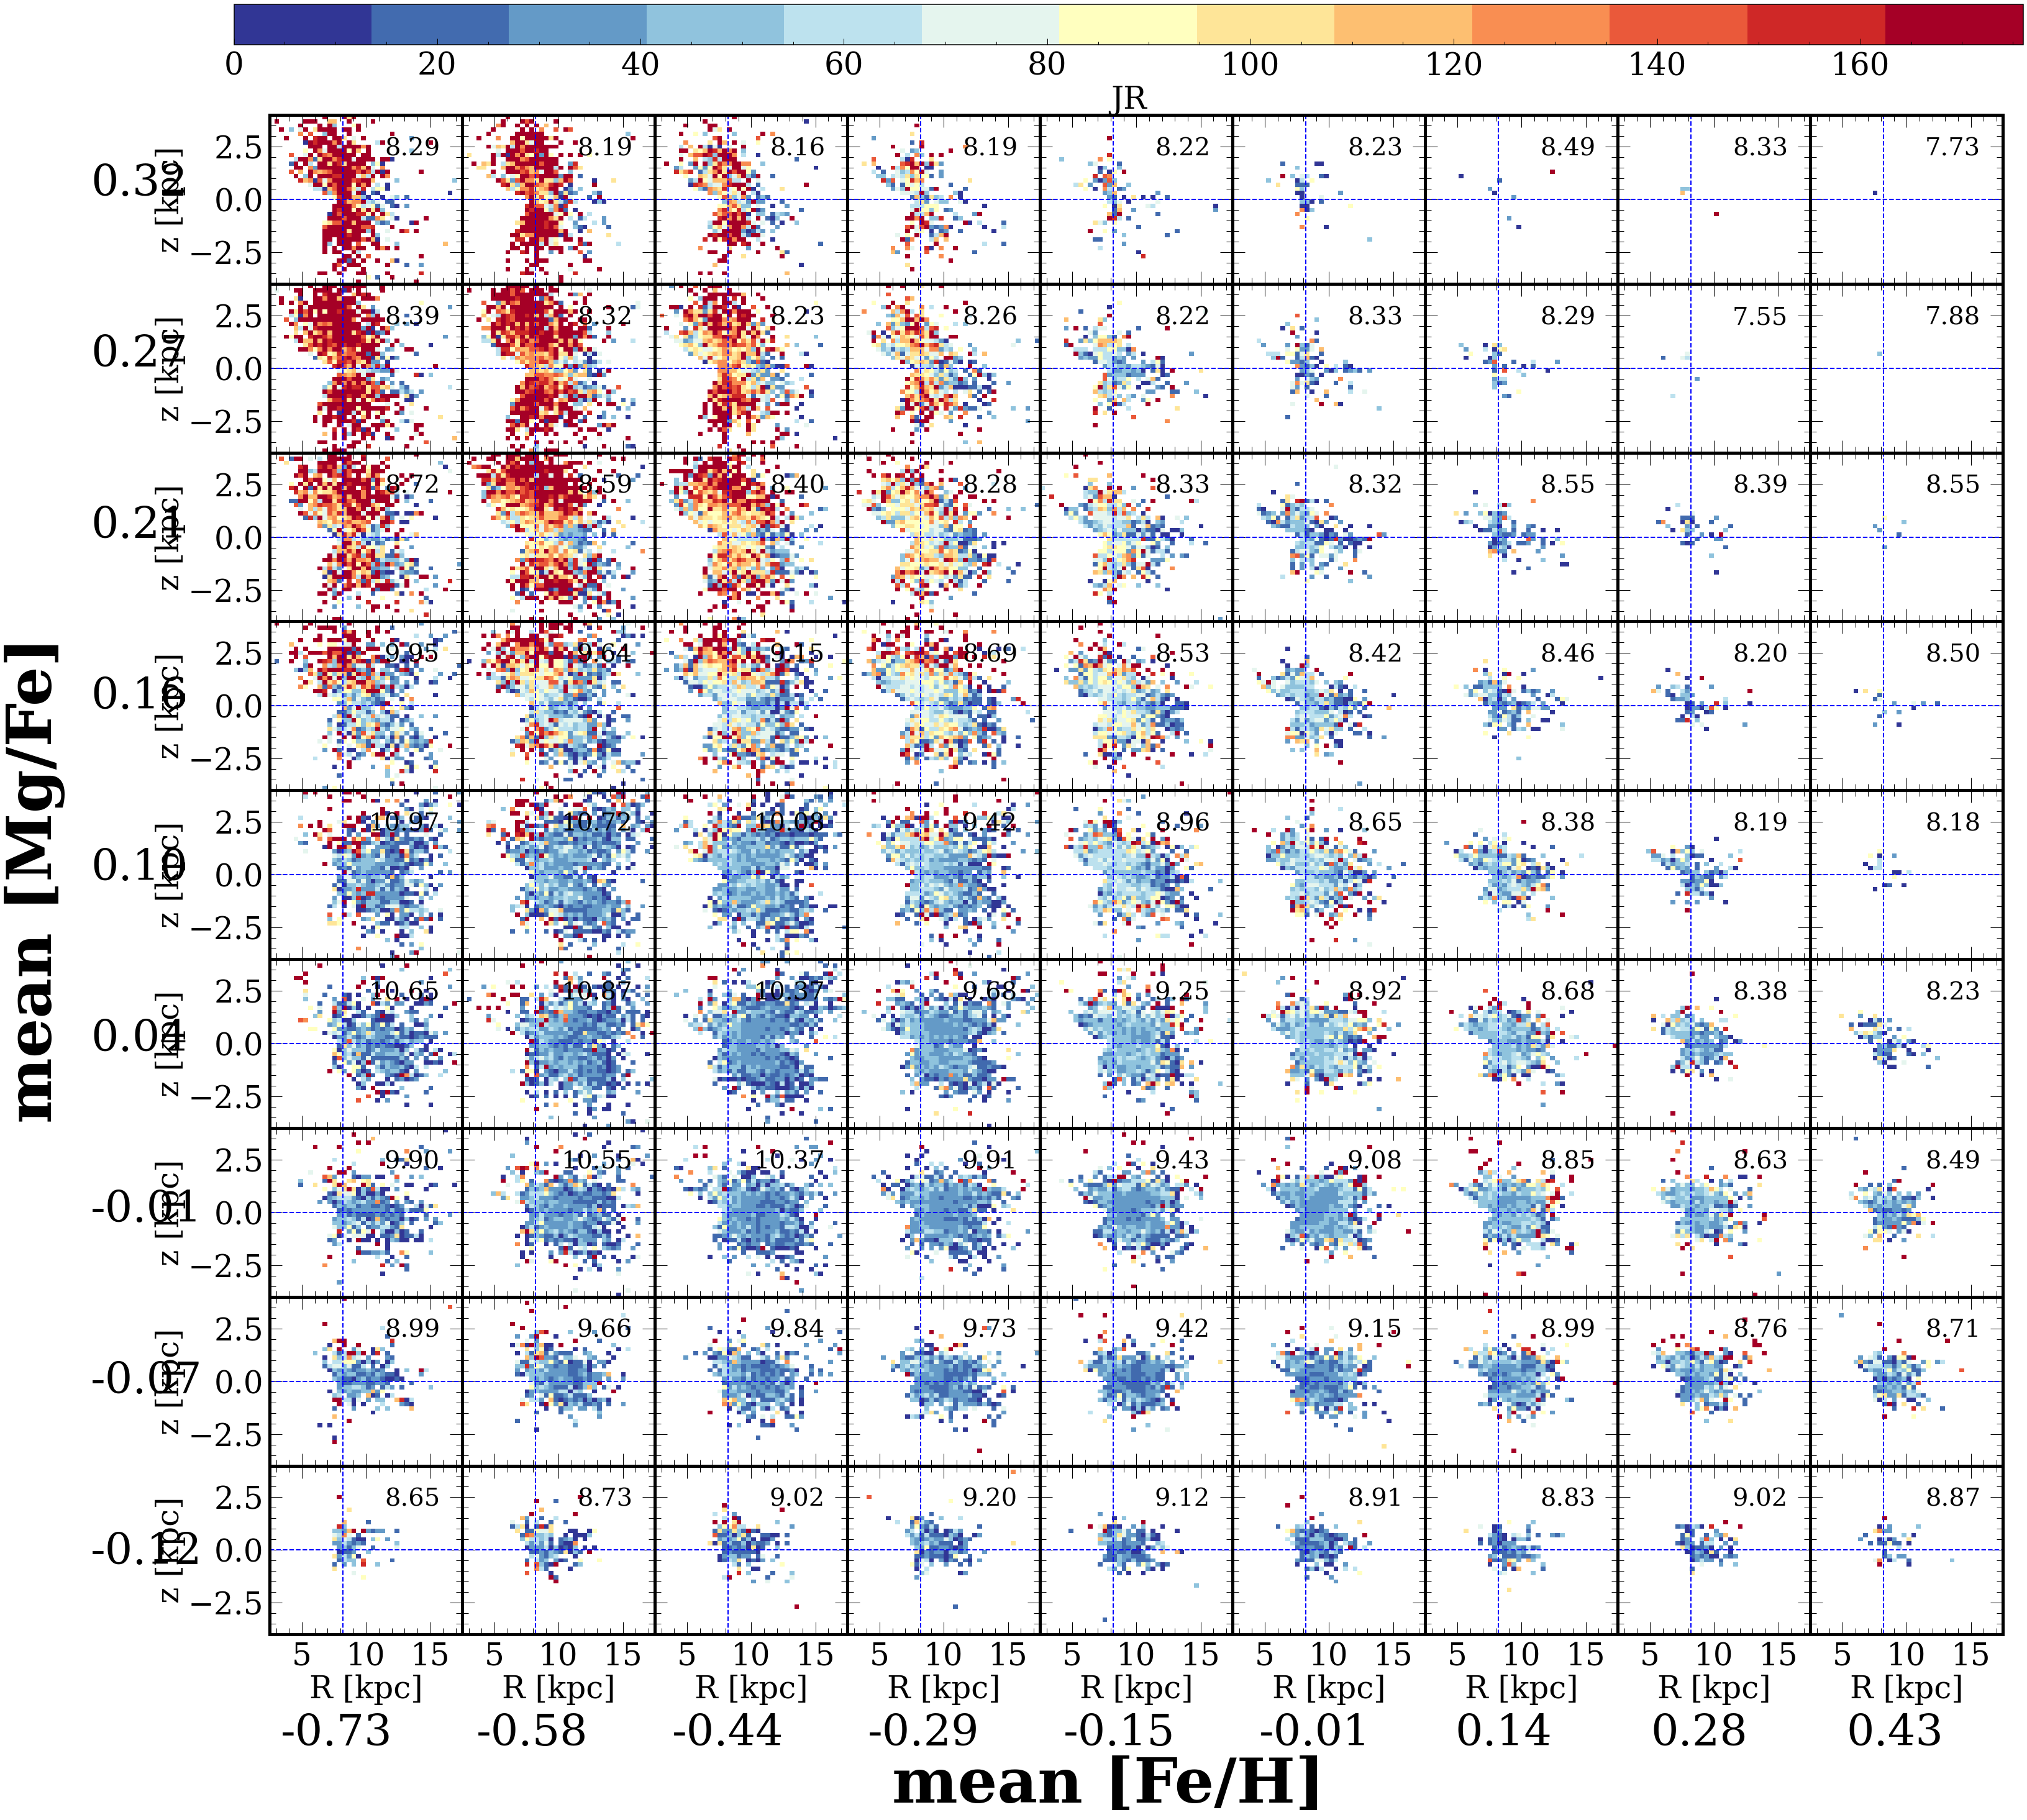

In [25]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(lamost_orbit))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=lamost_orbit.loc[lamost_orbit['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['JR'].values*220*8,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=0.1*220*8)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('JR',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


plt.savefig('monofealpha_jr.png')







  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

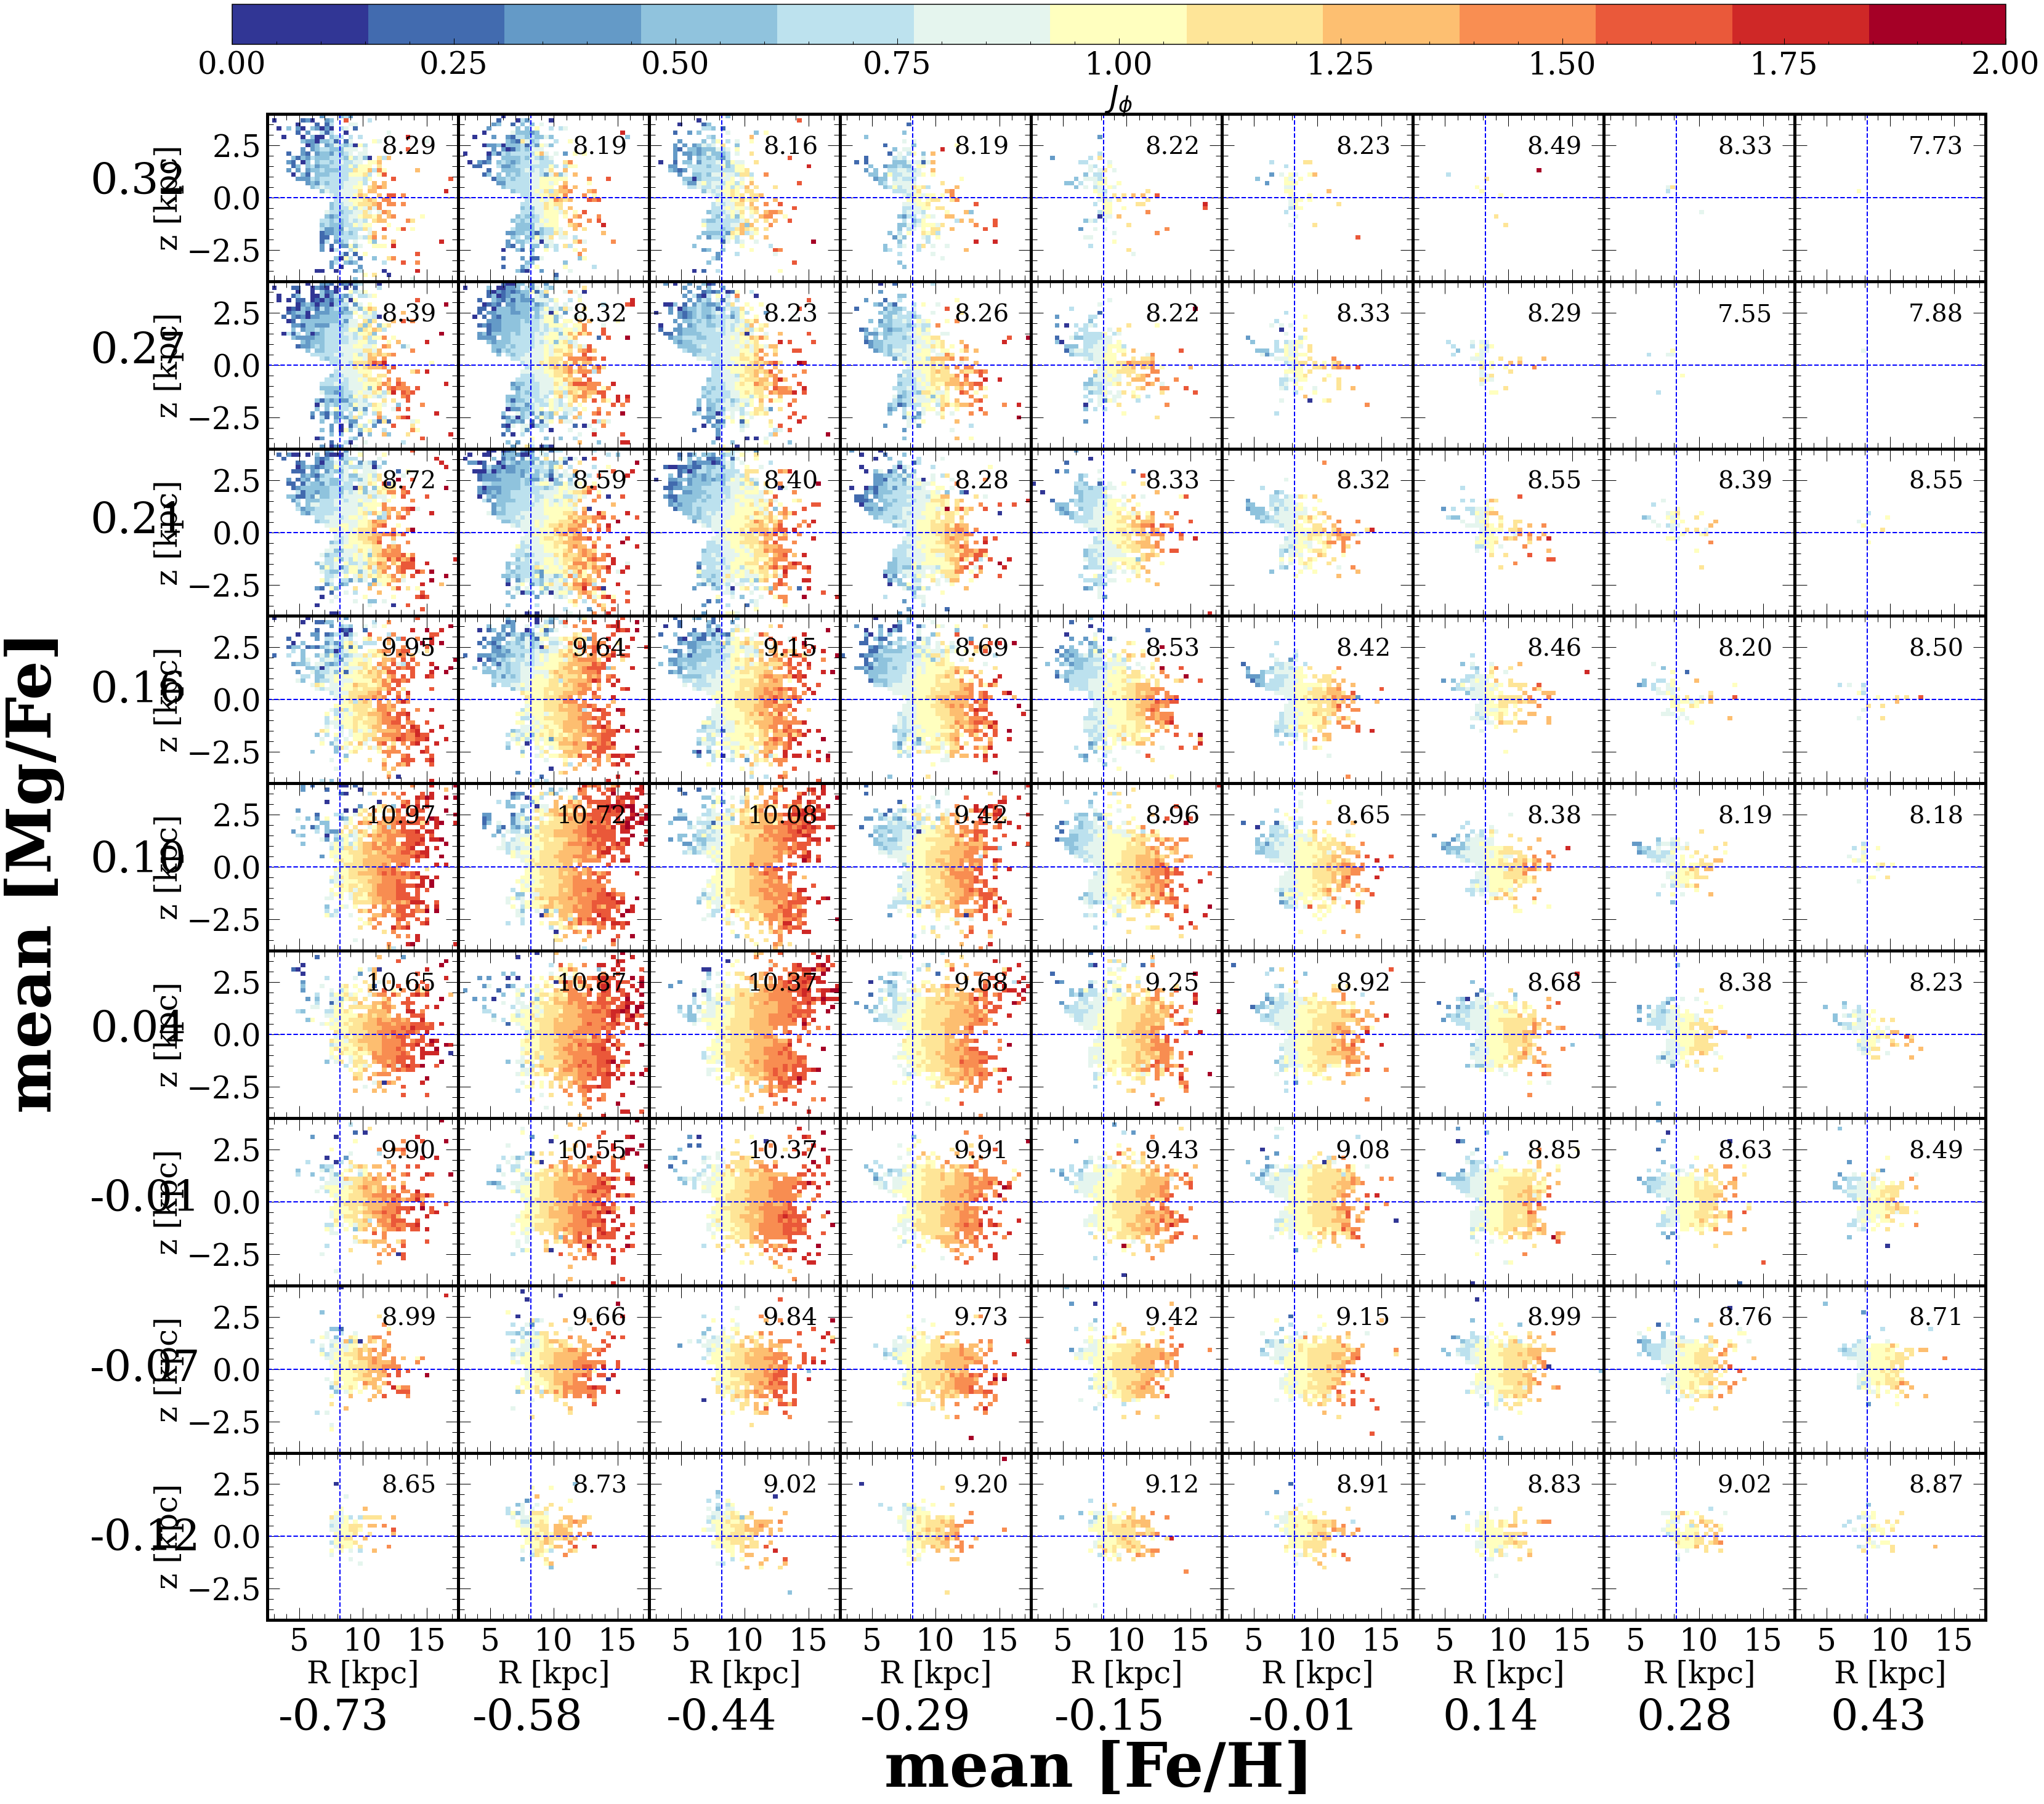

In [86]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(lamost_orbit))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=lamost_orbit.loc[lamost_orbit['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['Jphi'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=2)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('$J_ϕ$',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


#plt.savefig('monofealpha.png')






